# Case Study:   Bellabeat With R
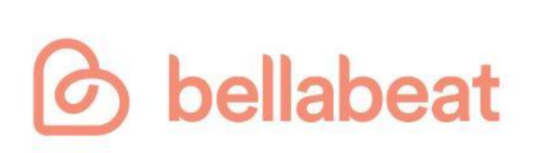

# Introduction
Welcome to the Bellabeat data analysis case study! In this case study, i will perform many real-world tasks of a junior data analyst. I am working for Bellabeat, a high-tech manufacturer of health-focused products for women, and
meet diŨerent characters and team members. In order to answer the key business questions, i will follow the steps of the
data analysis process: **ask**, **prepare**, **process**, **analyze**, **share**, and **act**. 

# Scenario 
As a junior data analyst at bellabeat company, i've been tasked to focus on one of
Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights i discover will then help guide marketing strategy for the company. 

# Ask
In this phase of analysis, the key focus is to fully understand the stakeholders' needs and requests to ensure the insights provided are relevant and actionable.

### Business Tasks:
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?


# Prepare
The prepare phase includes identifying reliable data sources, assessing data credibility, and checking for completeness and consistency.
The project manager asked me to use [ FitBit Fitness Tracker Data](https://www.kaggle.com/datasets/arashnic/fitbit/) (CC0: Public Domain, dataset made available through Mobius).
This Kaggle data set contains personal fitness tracker from thirty fitbit users. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

### Key tasks
1. Download data and store it appropriately.
2. Identify how it’s organized.
3. Sort and filter the data.
4. Determine the credibility of the data.

In [1]:
# Packages
library(tidyverse)
library(lubridate)
library(janitor)
library(gridExtra)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [2]:
daily_activity1 <- as.data.frame(read.csv ("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv",
                            na.strings = c("", "NA"), stringsAsFactors = FALSE, check.name = FALSE, fileEncoding = "UTF-8"))
daily_activity2 <- as.data.frame(read.csv ("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv",
                            na.strings = c("", "NA"), stringsAsFactors = FALSE, check.name = FALSE, fileEncoding = "UTF-8"))
heart_rate1 <- as.data.frame(read.csv ("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv",
                        na.strings = c("", "NA"), stringsAsFactors = FALSE, check.name = FALSE, fileEncoding = "UTF-8"))
heart_rate2 <- as.data.frame(read.csv ("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv",
                        na.strings = c("", "NA"), stringsAsFactors = FALSE, check.name = FALSE, fileEncoding = "UTF-8"))
sleep1 <- as.data.frame(read.csv ("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv",
                   na.strings = c("", "NA"), stringsAsFactors = FALSE, check.name = FALSE, fileEncoding = "UTF-8"))
sleep2 <- as.data.frame(read.csv ("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv",
                   na.strings = c("", "NA"), stringsAsFactors = FALSE, check.name = FALSE, fileEncoding = "UTF-8"))
weight1 <- as.data.frame(read.csv ("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv",
                    na.strings = c("", "NA"), stringsAsFactors = FALSE, check.name = FALSE, fileEncoding = "UTF-8"))
weight2 <- as.data.frame(read.csv ("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv", 
                    na.strings = c("", "NA"), stringsAsFactors = FALSE, check.name = FALSE, fileEncoding = "UTF-8"))
step_hour1 <- as.data.frame(read.csv ("/kaggle/input/fitbit/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv",
                       na.strings = c("", "NA"), stringsAsFactors = FALSE, check.name = FALSE, fileEncoding = "UTF-8"))
step_hour2 <- as.data.frame(read.csv ("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv",
                       na.strings = c("", "NA"), stringsAsFactors = FALSE, check.name = FALSE, fileEncoding = "UTF-8"))


Befor merging data, first its necessary to make sure there is consistency in our datasets.

In [13]:
# checking datasets' structure
str(weight1)
str(weight2)
str(daily_activity1)
str(daily_activity2)
str(heart_rate1)
str(heart_rate2)
str(sleep1)
str(sleep2)
str(step_hour1)
str(step_hour2)

tibble [98 × 4] (S3: tbl_df/tbl/data.frame)
 $ id         : num [1:98] 1.50e+09 1.50e+09 1.50e+09 1.93e+09 1.93e+09 ...
 $ date       : Date[1:98], format: "2016-04-05" "2016-05-02" ...
 $ mean_weight: num [1:98] 53.3 52.6 52.6 129.6 133.5 ...
 $ mean_bmi   : num [1:98] 23 22.6 22.6 46.2 47.5 ...
'data.frame':	67 obs. of  8 variables:
 $ Id            : num  1.50e+09 1.50e+09 1.93e+09 2.87e+09 2.87e+09 ...
 $ Date          : chr  "5/2/2016 11:59:59 PM" "5/3/2016 11:59:59 PM" "4/13/2016 1:08:52 AM" "4/21/2016 11:59:59 PM" ...
 $ WeightKg      : num  52.6 52.6 133.5 56.7 57.3 ...
 $ WeightPounds  : num  116 116 294 125 126 ...
 $ Fat           : int  22 NA NA NA NA 25 NA NA NA NA ...
 $ BMI           : num  22.6 22.6 47.5 21.5 21.7 ...
 $ IsManualReport: chr  "True" "True" "False" "True" ...
 $ LogId         : num  1.46e+12 1.46e+12 1.46e+12 1.46e+12 1.46e+12 ...
'data.frame':	457 obs. of  15 variables:
 $ Id                      : num  1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ Acti

In [3]:
# merging related datasets
weight <- bind_rows (weight1, weight2)
step_hourly <- bind_rows(step_hour1, step_hour2)
sleep <- bind_rows (sleep1, sleep2)
heart_rate <- bind_rows(heart_rate1, heart_rate2)
activity <- bind_rows(daily_activity1, daily_activity2)

In [14]:
# Checking if transporting data executed well
nrow(step_hour1) + nrow(step_hour2)
nrow(step_hourly)

nrow(weight1) + nrow(weight2)
nrow(weight)

nrow(sleep1) + nrow(sleep2)
nrow(sleep)

nrow(heart_rate1) + nrow(heart_rate2)
nrow(heart_rate)

nrow(daily_activity1) + nrow(daily_activity2)
nrow(activity)


[1] 46183

[1] 46008

[1] 165

[1] 98

[1] 387080

[1] 382780

[1] 3638339

[1] 3614915

[1] 1397

[1] 1397

In [ ]:
# getting a sense of data
head(sleep)
head(weight)
head(heart_rate)
head(step_hourly)
head(activity)

# Process
In this stage of analysis, the key focus is on cleaning datasets from errors, outliers, and inconsistencies.

### Key tasks
1. Check the data for errors.
2. Choose your tools.
3. Transform the data so you can work with it eŨectively.
4. Document the cleaning process.

In [4]:
# cleaning data
## removing duplicated values
weight <- weight[!duplicated(weight),]
sleep <- sleep[!duplicated(sleep),]
heart_rate <- heart_rate[!duplicated(heart_rate),]
activity <- activity[!duplicated(activity),]
step_hourly <- step_hourly[!duplicated(step_hourly),]

## Trimming white spaces 
sleep[] <- lapply (sleep, function(x) if(is.character(x)) trimws(x) else x)
weight[] <- lapply (weight, function(x) if(is.character(x)) trimws(x) else x)
heart_rate[] <- lapply (heart_rate, function(x) if(is.character(x)) trimws(x) else x)
step_hourly[] <- lapply(step_hourly, function(x) if(is.character(x)) trimws(x) else x)
activity[] <- lapply(activity, function(x) if(is.character(x)) trimws(x) else x) 

## Standardizing column names
weight <- clean_names (weight)
sleep <- clean_names (sleep)
activity <- clean_names (activity)
step_hourly <- clean_names (step_hourly)
heart_rate <- clean_names (heart_rate)

In [5]:
# converting data from chr to date-time
weight <- weight %>%
mutate(date = mdy_hms(date))  
str(weight$date)

activity <- activity %>%
mutate(activity_date = mdy(activity_date))
str(activity$activity_date)

heart_rate <- heart_rate %>%
mutate(time = mdy_hms(time))
str(heart_rate$time)

sleep <- sleep %>%
mutate(date = mdy_hms(date))
str(sleep$date)

step_hourly <- step_hourly %>%
mutate(activity_hour = mdy_hms(activity_hour))
str(step_hourly$activity_hour)


 POSIXct[1:98], format: "2016-04-05 23:59:59" "2016-04-10 18:33:26" "2016-04-03 23:59:59" ...
 Date[1:1397], format: "2016-03-25" "2016-03-26" "2016-03-27" "2016-03-28" "2016-03-29" ...
 POSIXct[1:3614915], format: "2016-04-01 07:54:00" "2016-04-01 07:54:05" "2016-04-01 07:54:10" ...
 POSIXct[1:382780], format: "2016-03-13 02:39:30" "2016-03-13 02:40:30" "2016-03-13 02:41:30" ...
 POSIXct[1:46008], format: "2016-03-12 00:00:00" "2016-03-12 01:00:00" "2016-03-12 02:00:00" ...


In [ ]:
## Identifying Missing values
sapply(weight, function(x) sum(is.na(x)))
sapply(sleep, function(x) sum(is.na(x)))
sapply(activity, function(x) sum(is.na(x)))
sapply(step_hourly, function(x) sum(is.na(x)))
sapply(heart_rate, function(x) sum(is.na(x)))

### Range validation
- BMI should fall between ~10-50
- Total steps should be realist.
- Heart rate more than 300 could be far-fetched
- sleep hour should be between 0- 24.
- Step should not be more than 100.100 


In [16]:
# Checking data for any outlier or error
## weight
summary(weight)

## sleep
summary(sleep)

## activity
summary(activity)

##step_hourly
summary(step_hourly)

## heart_rate
summary(heart_rate)


       id                 date                          weight_kg     
 Min.   :1.504e+09   Min.   :2016-03-30 23:59:59.00   Min.   : 52.60  
 1st Qu.:6.962e+09   1st Qu.:2016-04-09 02:01:32.25   1st Qu.: 61.50  
 Median :6.962e+09   Median :2016-04-20 03:22:26.50   Median : 62.50  
 Mean   :6.812e+09   Mean   :2016-04-20 21:30:11.66   Mean   : 72.47  
 3rd Qu.:8.878e+09   3rd Qu.:2016-05-01 23:59:59.00   3rd Qu.: 85.25  
 Max.   :8.878e+09   Max.   :2016-05-12 23:59:59.00   Max.   :133.50  
                                                                      
 weight_pounds        fat             bmi        is_manual_report  
 Min.   :116.0   Min.   :10.00   Min.   :21.45   Length:98         
 1st Qu.:135.6   1st Qu.:19.00   1st Qu.:24.00   Class :character  
 Median :137.8   Median :22.00   Median :24.39   Mode  :character  
 Mean   :159.8   Mean   :19.75   Mean   :25.37                     
 3rd Qu.:187.9   3rd Qu.:22.75   3rd Qu.:25.59                     
 Max.   :294.3   Max.   

       id                 date                            value      
 Min.   :1.504e+09   Min.   :2016-03-11 21:19:30.00   Min.   :1.000  
 1st Qu.:3.977e+09   1st Qu.:2016-03-27 20:15:45.00   1st Qu.:1.000  
 Median :4.703e+09   Median :2016-04-11 02:27:00.00   Median :1.000  
 Mean   :4.910e+09   Mean   :2016-04-11 03:11:35.36   Mean   :1.091  
 3rd Qu.:6.776e+09   3rd Qu.:2016-04-26 04:45:00.00   3rd Qu.:1.000  
 Max.   :8.792e+09   Max.   :2016-05-12 09:56:00.00   Max.   :3.000  
     log_id         
 Min.   :1.110e+10  
 1st Qu.:1.124e+10  
 Median :1.137e+10  
 Mean   :1.137e+10  
 3rd Qu.:1.150e+10  
 Max.   :1.162e+10  

       id            activity_date         total_steps    total_distance  
 Min.   :1.504e+09   Min.   :2016-03-12   Min.   :    0   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-09   1st Qu.: 3146   1st Qu.: 2.170  
 Median :4.445e+09   Median :2016-04-19   Median : 6999   Median : 4.950  
 Mean   :4.781e+09   Mean   :2016-04-19   Mean   : 7281   Mean   : 5.219  
 3rd Qu.:6.962e+09   3rd Qu.:2016-04-30   3rd Qu.:10544   3rd Qu.: 7.500  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
 tracker_distance logged_activities_distance very_active_distance
 Min.   : 0.000   Min.   :0.0000             Min.   : 0.000      
 1st Qu.: 2.160   1st Qu.:0.0000             1st Qu.: 0.000      
 Median : 4.950   Median :0.0000             Median : 0.100      
 Mean   : 5.192   Mean   :0.1315             Mean   : 1.397      
 3rd Qu.: 7.480   3rd Qu.:0.0000             3rd Qu.: 1.830      
 Max.   :28.030   Max.   :6.7271             Max.   :21.920      
 moderately_a

       id            activity_hour                      step_total     
 Min.   :1.504e+09   Min.   :2016-03-12 00:00:00.00   Min.   :    0.0  
 1st Qu.:2.320e+09   1st Qu.:2016-03-26 12:00:00.00   1st Qu.:    0.0  
 Median :4.559e+09   Median :2016-04-10 10:30:00.00   Median :   21.0  
 Mean   :4.870e+09   Mean   :2016-04-10 17:02:57.23   Mean   :  302.9  
 3rd Qu.:6.962e+09   3rd Qu.:2016-04-25 16:00:00.00   3rd Qu.:  323.0  
 Max.   :8.878e+09   Max.   :2016-05-12 15:00:00.00   Max.   :10565.0  

       id                 time                            value       
 Min.   :2.022e+09   Min.   :2016-03-29 00:00:05.00   Min.   : 36.00  
 1st Qu.:4.020e+09   1st Qu.:2016-04-09 09:15:05.00   1st Qu.: 64.00  
 Median :5.554e+09   Median :2016-04-19 20:25:20.00   Median : 74.00  
 Mean   :5.461e+09   Mean   :2016-04-20 07:24:37.66   Mean   : 78.14  
 3rd Qu.:6.962e+09   3rd Qu.:2016-04-30 20:31:35.00   3rd Qu.: 89.00  
 Max.   :8.878e+09   Max.   :2016-05-12 16:20:00.00   Max.   :203.00  

In [ ]:
# checking data integrity
## checking total unique id for each dataset
### sleep
length(unique(sleep$id))
### weight
length(unique(weight$id))
### heart_rate
length(unique(heart_rate$id))
### activity
length(unique(activity$id))
#step_hourly
length(unique(step_hourly$id))

## Matched IDs in smaller datasets to the main one
length(setdiff(activity$id, step_hourly$id))  #Checked for unmatched IDs in the activity dataset
length(setdiff(sleep$id, activity$id))  #checking if all sleep id are part of activvity id
length(setdiff(weight$id, activity$id))   #checking if all weight id are part of activvity id


# Analyze
In the Analyze stage, I explored patterns and trends using summary statistics and visualizations to uncover insights about users’ activity, sleep, and weight behavior.

### Key tasks
1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform calculations.
4. Identify trends and relationships

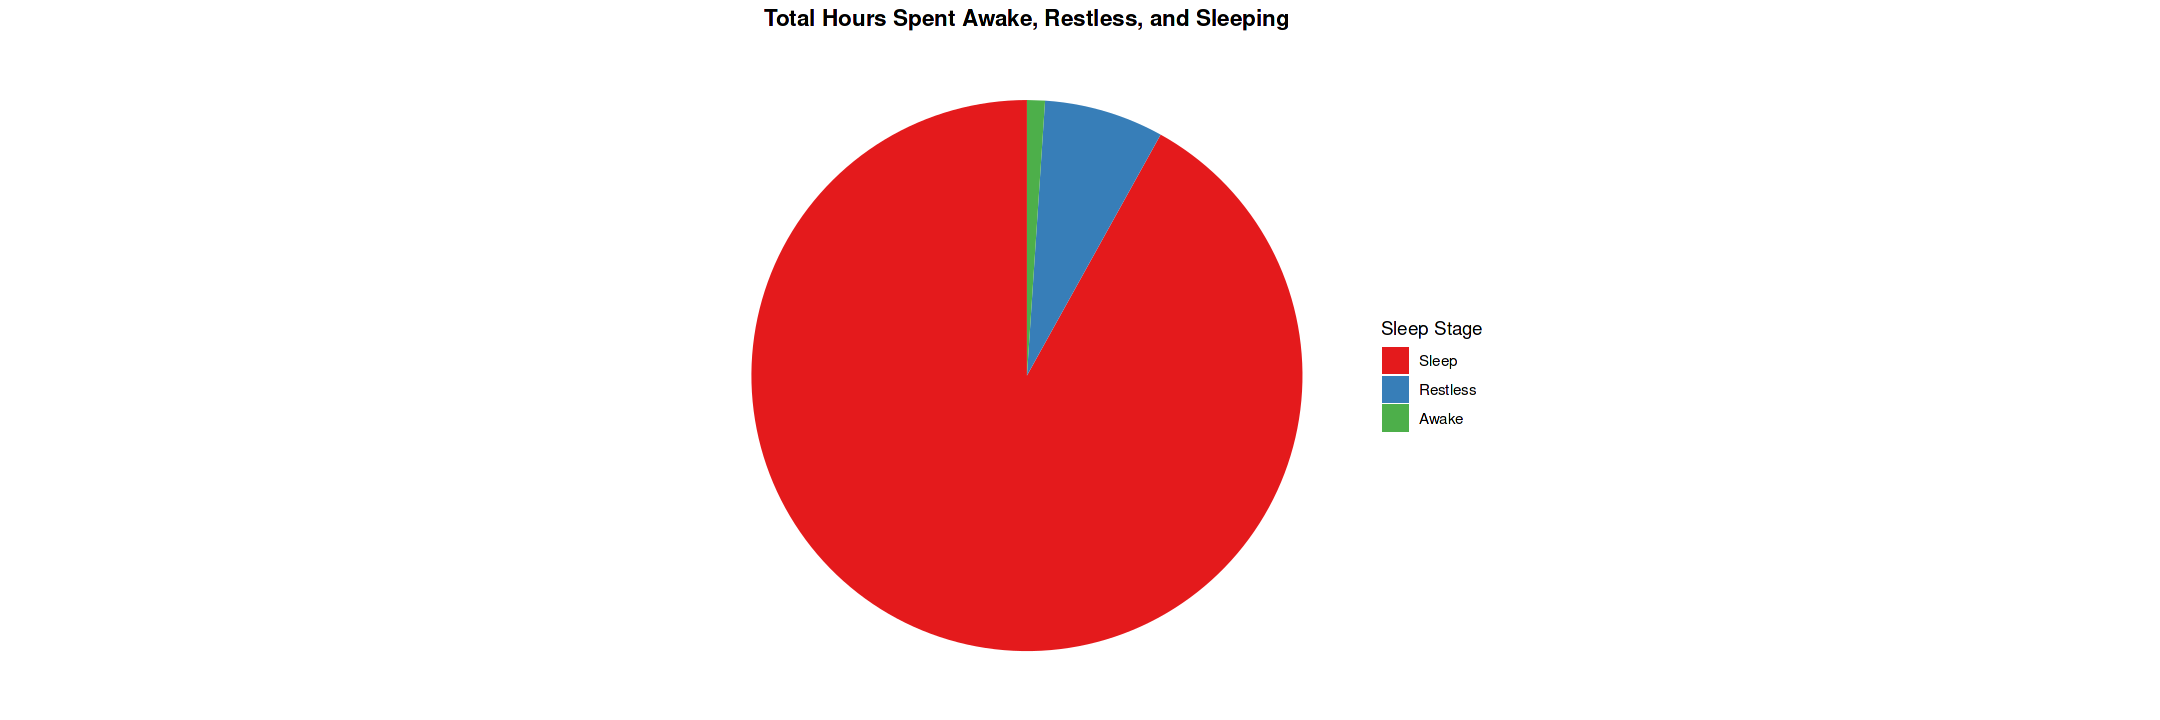

In [17]:
# Summarize total time per sleep stage
sleep_stage <- sleep %>%
  mutate(stage = factor(value, labels = c("Sleep", "Restless", "Awake"))) %>%
  count(stage)

# Plot as a pie chart
ggplot(sleep_stage, aes(x = "", y = n, fill = stage)) +
  geom_col(width = 1) +  # full circle width
  coord_polar(theta = "y") +  # turn it into a pie
  labs(title = "Total Hours Spent Awake, Restless, and Sleeping",
       fill = "Sleep Stage") +
  theme_void() +  # remove axes and background
  scale_fill_brewer(palette = "Set1") +
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))

#### Total Hours Spent Awake, Restless, and Sleeping
1. **Sleep** dominates the chart – it takes up more than 90% of total sleep time.
This indicates that the majority of tracked hours are spent in deep/resting sleep.

2. **Restless** sleep is the second largest slice, maybe 8–10%.
This could reflect tossing, turning, or disturbed sleep.

3. **Awake** time is the smallest slice, probably <5%.
This typically reflects waking moments during the night.
Minimal awake time suggests overall good sleep continuity.

In [18]:
# Sleep stage per weekday
sleep_week <- sleep %>%
mutate(weekday = factor(weekdays(date), levels = c("Monday","Tuesday","Wednesday","Thursday"
                                                   ,"Friday","Saturday","Sunday")),  # Convert timestamp to weekday
       stage = factor(value, labels = c("Sleep", "Restless","Awake"))) %>%
group_by(weekday,stage) %>%
summarize(hour =n(), .groups = "drop")  # Each row = 1 hour, so count = total hours
print(sleep_week)

# Sleep stage per hour of day
sleep_hour <- sleep %>%
mutate(activity_hour = hour(date), # Convert timestamp to weekday
      stage = factor(value, labels = c("Sleep", "Restless", "Awake"))) %>%   # Convert stages to readable labels
group_by(activity_hour,stage) %>%
summarize(total_hour = n(), .groups = "drop") %>% # Each row = 1 hour, so count = total hours
complete(activity_hour = 0:23, stage, fill = list(total_hour = 0))
print(sleep_hour)


# A tibble: 21 × 3
   weekday   stage     hour
   <fct>     <fct>    <int>
 1 Monday    Sleep    48018
 2 Monday    Restless  3358
 3 Monday    Awake      423
 4 Tuesday   Sleep    48094
 5 Tuesday   Restless  3754
 6 Tuesday   Awake      525
 7 Wednesday Sleep    52826
 8 Wednesday Restless  3879
 9 Wednesday Awake      538
10 Thursday  Sleep    47629
# ℹ 11 more rows
# A tibble: 72 × 3
   activity_hour stage    total_hour
           <int> <fct>         <int>
 1             0 Sleep         31551
 2             0 Restless       1815
 3             0 Awake           354
 4             1 Sleep         35538
 5             1 Restless       2240
 6             1 Awake           240
 7             2 Sleep         39399
 8             2 Restless       2442
 9             2 Awake           366
10             3 Sleep         42715
# ℹ 62 more rows


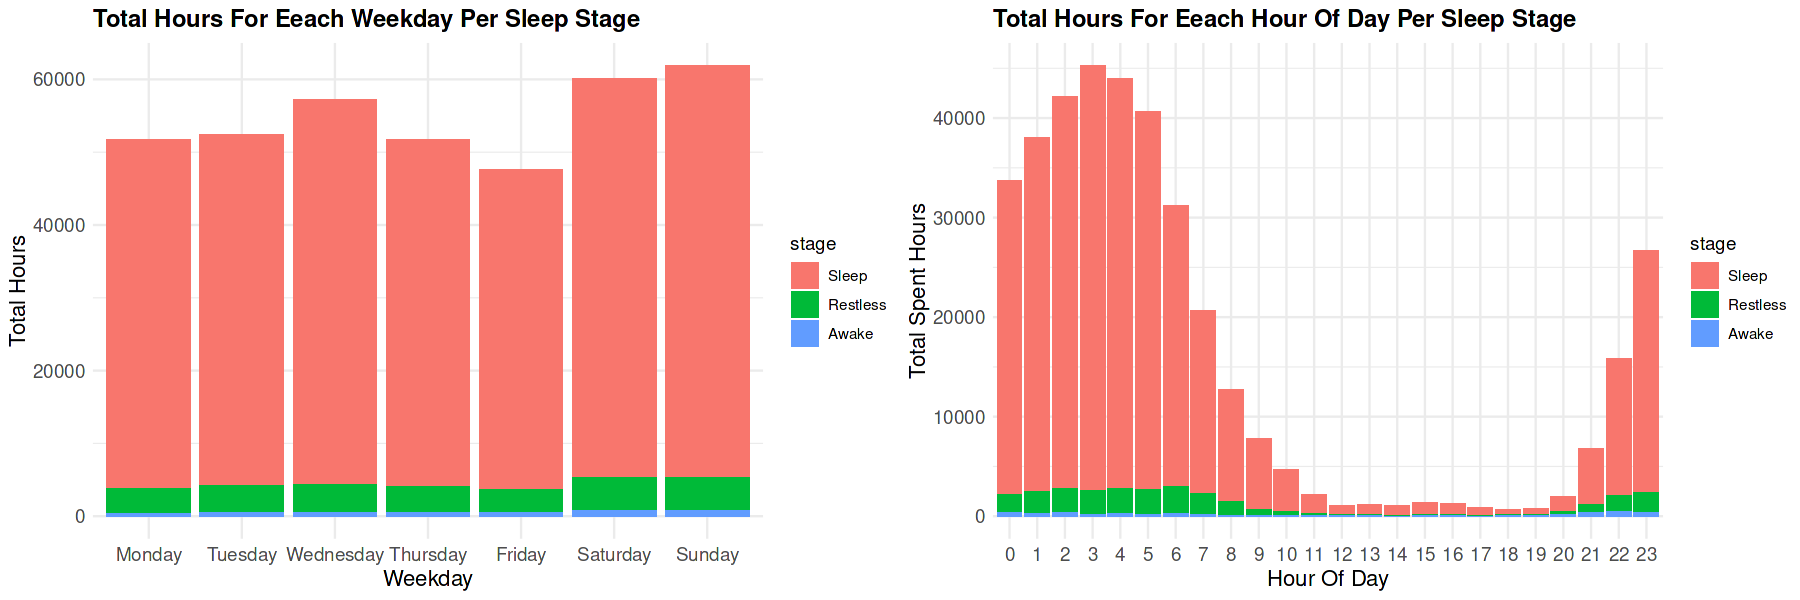

In [19]:
#chart for sleep per weekday
e1 <- ggplot(data = sleep_week, aes(x = weekday, y = hour, fill = stage)) +
geom_col() +
labs(title = "Total Hours For Eeach Weekday Per Sleep Stage", x = "Weekday", y = "Total Hours") +
theme_minimal() +
theme(plot.title = element_text (size =14, face = "bold"),  #adjust plot text and title 
     axis.text.x = element_text(size = 11),
     axis.text.y = element_text(size = 11),
     axis.title.x = element_text(size= 13),
     axis.title.y = element_text(size =13))

#chart for sleep per hour of day
e2 <- ggplot(data = sleep_hour, aes( x = factor(activity_hour), y = total_hour, fill = stage)) +
geom_col() +
labs(title = "Total Hours For Eeach Hour Of Day Per Sleep Stage", x = "Hour Of Day", y = "Total Spent Hours") +
theme_minimal() +
theme(plot.title = element_text (size =14, face = "bold"),  #adjust plot text and title
     axis.text.x = element_text(size = 11),
     axis.text.y = element_text(size = 11),
     axis.title.x = element_text(size= 13),
     axis.title.y = element_text(size =13))

# adjust plot size
options(repr.plot.width = 15, repr.plot.height =5)

# combine two plot together
grid.arrange(e1, e2, nrow = 1)    #Display them side by side

#### Total Hours for Each Weekday per Sleep Stage
1. Weekends (Saturday & Sunday) show the highest total sleep hours, especially in the "Sleep" stage (logical, people sleep in more).
2. Friday has the lowest total sleep hours, possibly due to people staying up late or changes in routine.
3. Restless and Awake stages are relatively consistent across the week — small bars at the bottom.

#### Total Hours for Each Hour of Day per Sleep Stage
1. Peak sleeping happens between 0:00 (midnight) and 6:00 AM — especially 2:00–4:00 AM (highest red bars).
2. Sharp decline after 6:00 AM, with sleep nearly ending by 8:00 AM.
3. There's a minor rise at 22:00–23:00, signaling people starting to sleep again before midnight.
4. Restless and Awake times are mostly within the 0–7 AM range — indicating fragmented sleep for some users.


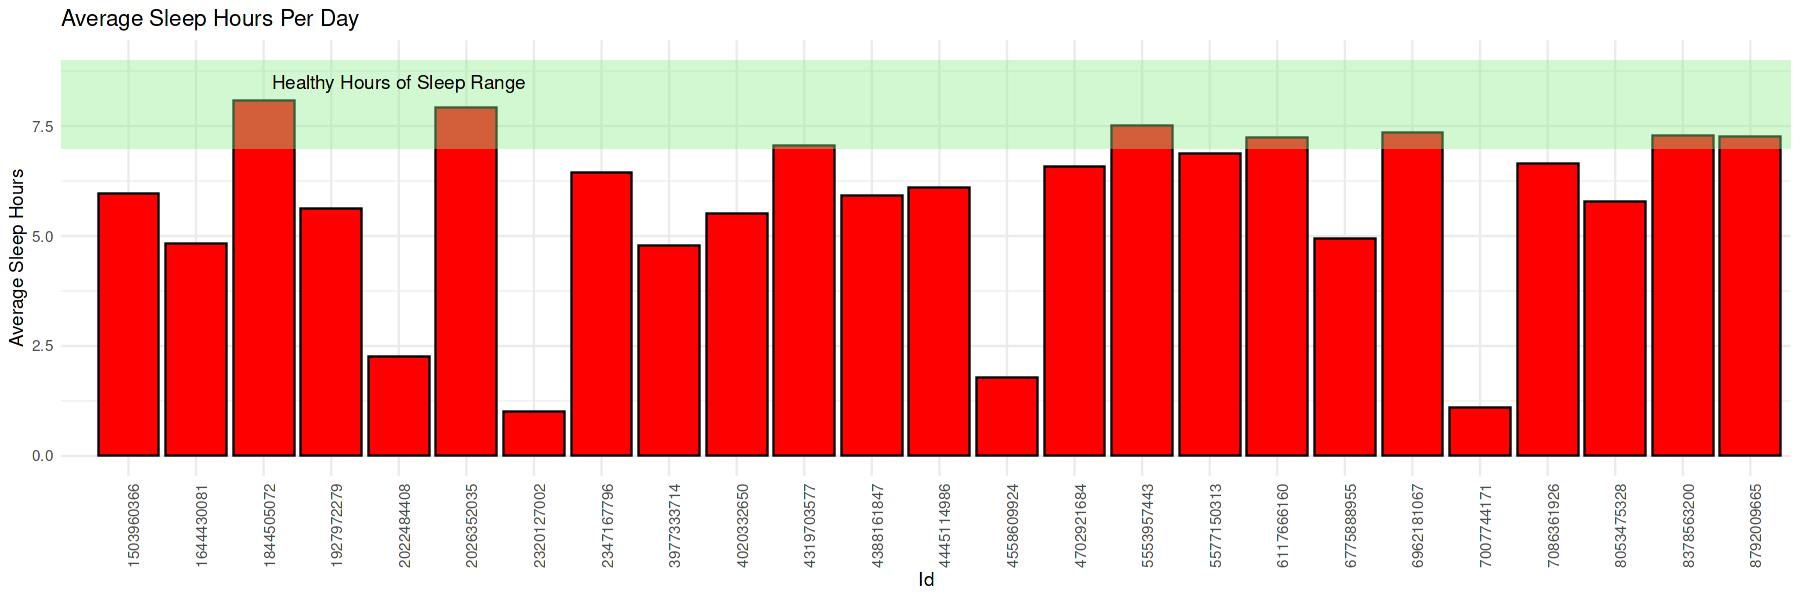

In [20]:
# calculate average asleep per id
avg_sleep_hours <- sleep %>%
  mutate(sleep_date = as_date(date)) %>%  #extract date 
  filter(value == 1 ) %>%  # Only count stage 1 of sleep cycle
  group_by(id, sleep_date) %>%
  summarise(daily_sleep = n()/60, .groups = "drop") %>% # total sleep per date and id
  group_by(id) %>%
  summarize(avg_sleep = mean(daily_sleep), .groups = "drop")

#dispaly in a chart
ggplot(data = avg_sleep_hours) +
geom_col(mapping = aes(x = factor(id), y = avg_sleep), fill = "red", color = "black") +
labs(title = "Average Sleep Hours Per Day", x = "Id", y = "Average Sleep Hours") +
annotate("rect", xmin = 0, xmax = Inf, ymin = 7, ymax = 9, alpha = 0.4, fill = "lightgreen") +  #create a healthy hours of sleep
annotate("text", x = 5, y = 8.5, label = "Healthy Hours of Sleep Range" )+ #add label to healthy range
theme_minimal() +
theme(axis.text.x = element_text(angle = 90))
    

#### Average Sleep Hours Per Day
- The average sleep in this chart is between 5-5/5 hours per day.
- According to the chart, most users tend to sleep fewer hours than recommended for a healthy lifestyle. This could be due to either not tracking their sleep with the device or following unhealthy sleep habits.

In [21]:
# Total steps per weekday
step_weekday <- step_hourly %>% 
mutate(activity_day = factor(weekdays(activity_hour), #extract weekday from date-time
                             levels = c("Monday","Tuesday","Wednesday","Thursday", "Friday", "Saturday","Sunday"))) %>%
group_by(activity_day) %>%
summarise(step_total = mean(step_total))   #Calculate total steps for each weekday
print(step_weekday)

#Total steps per hour
step_hour <- step_hourly %>% 
mutate(activity_hour = hour(activity_hour)) %>%   #extract hour from date-time
group_by(activity_hour) %>%
summarize(step_total = mean(step_total))   #Calculate total steps for each of weekday
print(step_hour)


# A tibble: 7 × 2
  activity_day step_total
  <fct>             <dbl>
1 Monday             298.
2 Tuesday            311.
3 Wednesday          307.
4 Thursday           309.
5 Friday             299.
6 Saturday           316.
7 Sunday             282.
# A tibble: 24 × 2
   activity_hour step_total
           <int>      <dbl>
 1             0      43.4 
 2             1      21.9 
 3             2      13.7 
 4             3       6.85
 5             4      11.1 
 6             5      34.9 
 7             6     148.  
 8             7     283.  
 9             8     396.  
10             9     431.  
# ℹ 14 more rows


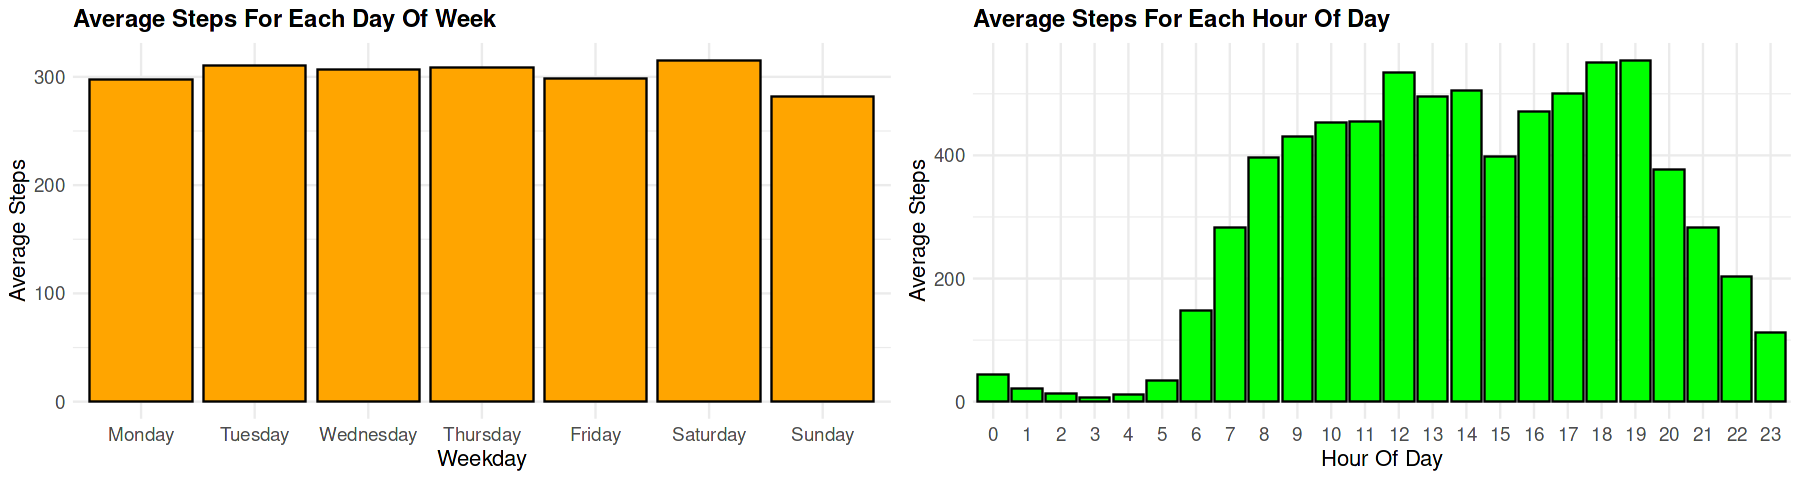

In [22]:
#create a chart based on weekday
p1 <- ggplot(data = step_weekday, aes(x = activity_day, y = step_total )) +
             geom_col(fill = "orange", color = "black") +
             labs(title = "Average Steps For Each Day Of Week", x = "Weekday", y = "Average Steps", fill =" Weekday") +
             theme_minimal() +   #remove noise from plot
theme(plot.title = element_text (size =14, face = "bold"),  #adjust plot text and title
     axis.text.x = element_text(size = 11),   # adjust axis x text size
     axis.text.y = element_text(size = 11),    #adjust axis y text size
     axis.title.x = element_text(size= 13),
     axis.title.y = element_text(size =13))


#create a chart based on hour of day
p2 <- ggplot(data = step_hour, aes( x = factor(activity_hour), y = step_total)) +
       geom_col(fill = "green", color = "black") +
       labs(title = "Average Steps For Each Hour Of Day", x = "Hour Of Day", y = "Average Steps") +
       theme_minimal() +  #remove noise from data
theme(plot.title = element_text (size =14, face = "bold"),  #adjust title text
     axis.text.x = element_text(size = 11),  # adjust axis x text size
     axis.text.y = element_text(size = 11),  #adjust axis y text size
     axis.title.x = element_text(size= 13),
     axis.title.y = element_text(size =13))


# Increase figure size
options(repr.plot.width = 15, repr.plot.height = 4)


#combine charts together
grid.arrange(p1, p2, nrow= 1)   #display side by side

#### Average Steps for Each Day of the Week
1. Steps are fairly consistent from Monday to Saturday (~300+ average steps).
- Saturday is the most active day — maybe due to free time, outdoor activities, or errands.
- Weekdays are similar, possibly due to routine (e.g., commuting, work breaks).
2. Sunday shows a noticeable drop, suggesting less physical activity.
- Sunday is the least active — likely a rest day, or people stay in more.

#### Average Steps for Each Hour of the Day
1. Activity starts to pick up around 6–7 AM.
2. Peak activity is between 10 AM and 7 PM, especially:
- 2 PM, 3 PM, and 6 PM show particularly high step counts.
3. Activity sharply drops after 8 PM, almost stopping at midnight.

In [23]:
# summarzie heart rate per day of week
heart_weekday <- heart_rate %>%
mutate(weekday = factor(weekdays(time), levels = c("Monday","Tuesday","Wednesday","Thursday",
                       "Friday","Saturday","Sunday"))) %>%  #extract weekday from date and ajust the order
group_by(weekday) %>%
summarize (hr = mean(value))
print(heart_weekday)


# summarize heart rate per hour of day
heart_hour <- heart_rate %>%
mutate(activity_hour = hour(time)) %>%   #extract hour from date
group_by(activity_hour) %>%
summarize (hr = mean(value))
 print(heart_hour)

# A tibble: 7 × 2
  weekday      hr
  <fct>     <dbl>
1 Monday     77.4
2 Tuesday    77.5
3 Wednesday  77.4
4 Thursday   78.1
5 Friday     78.8
6 Saturday   80.1
7 Sunday     77.6
# A tibble: 24 × 2
   activity_hour    hr
           <int> <dbl>
 1             0  67.9
 2             1  66.8
 3             2  64.5
 4             3  62.0
 5             4  61.1
 6             5  63.5
 7             6  73.2
 8             7  75.6
 9             8  77.7
10             9  80.8
# ℹ 14 more rows


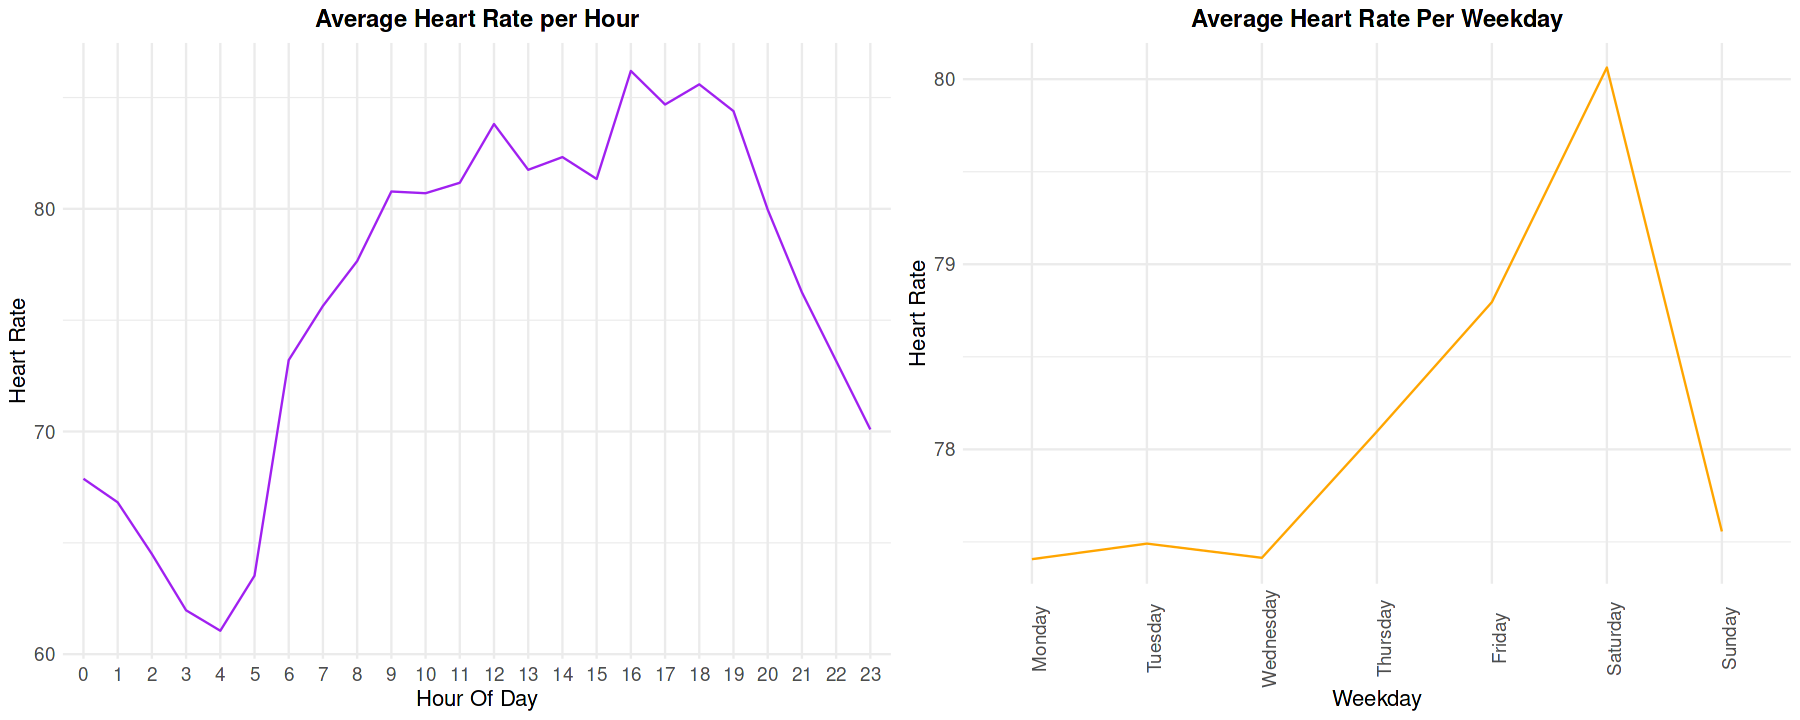

In [24]:
# display avg heart rate per hour plot
M1 <- ggplot(data = heart_hour, aes (x = factor(activity_hour), y = hr)) + 
geom_line ( color = "purple", group = 1) +
labs(title = "Average Heart Rate per Hour", x = "Hour Of Day", y = "Heart Rate") +
theme_minimal() +   # decluttering 
theme(plot.title = element_text (size = 14, face = "bold", hjust =0.5),   #adjust text and title
     axis.text.x = element_text(size = 11),
     axis.text.y = element_text(size =11),
     axis.title.x = element_text(size =13),
     axis.title.y = element_text(size = 13))

# display avg heart rate per weekday plot
M2 <- ggplot(data = heart_weekday, aes (x = factor(weekday), y = hr)) + 
geom_line ( color = "orange", group = 1) +
labs(title = "Average Heart Rate Per Weekday", x = "Weekday", y = "Heart Rate") +
theme_minimal() +   #decluttering 
theme(plot.title = element_text (size = 14, face = "bold", hjust =0.5),  #adjust title and text
     axis.text.x = element_text(size = 11, angle =90),
     axis.text.y = element_text(size =11),
     axis.title.x = element_text(size =13),
     axis.title.y = element_text(size = 13))

# adjust plots size 
options(repr.plot.width = 15, repr.plot.height = 6)


# combine two plot together
grid.arrange(M1,M2, ncol = 2)  # display side by side

#### Average Heart Rate by Hour of Day
1. Lowest heart rates occur between 2 AM and 5 AM (around 61–63 bpm), suggesting restful sleep.
2. After 5 AM, heart rate rises sharply — this reflects waking up and starting daily activity.
3. Heart rate peaks between 11 PM and 6 PM, with values exceeding 85 bpm, showing high activity or engagement levels during these hours.
4. It gradually decreases after 8 PM, falling to about 70 bpm by 11 PM, signaling winding down or reduced activity.

#### Average Heart Rate per Weekday
1. Saturday shows the highest average heart rate, possibly due to:
- Increased physical activity (e.g., workouts, outings).
- Higher stress levels or social events.
2. Sunday’s drop may indicate rest, recovery, or less activity.
3. Weekdays (Mon–Wed) remain steady, suggesting routine or moderate activity levels.


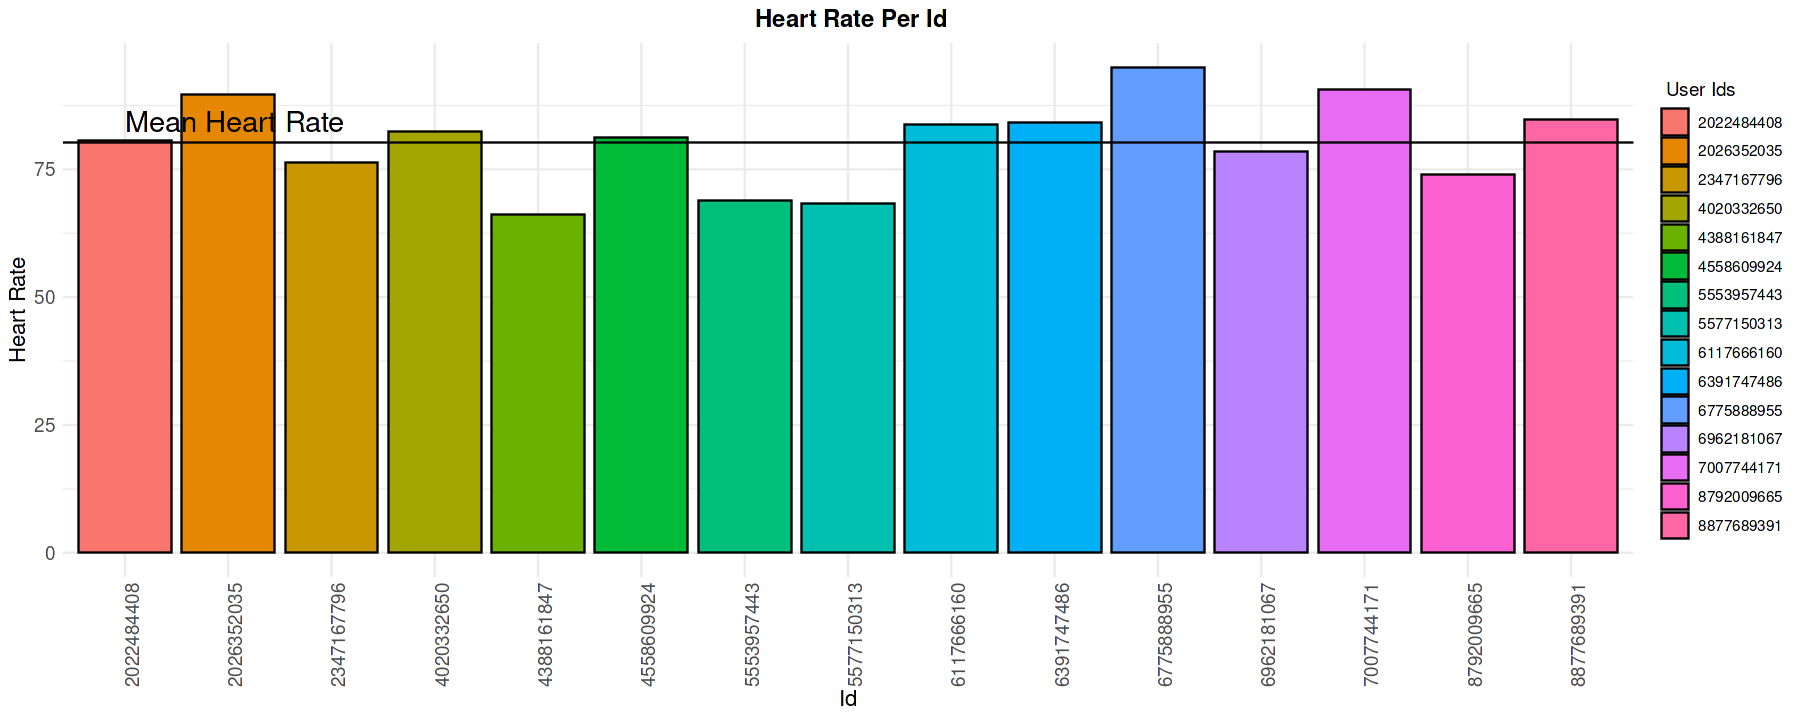

In [25]:
# Average heart rate per ids
heart_id <- heart_rate %>%
group_by(id) %>%
summarize(hr = mean(value))
          
# Display avg heart_Rate per Ids
ggplot() +
geom_col(data = heart_id, aes(x = factor(id), y = hr , fill = factor(id)),color = "black") +
geom_hline(yintercept = mean(heart_id$hr), color = "black") +   #add an avg line
labs(title = " Heart Rate Per Id", x = "Id", y = "Heart Rate", fill =" User Ids") +
theme_minimal() + 
annotate("text", x = 1, y = mean(heart_id$hr) + 4, label = "Mean Heart Rate", hjust = 0, size = 6)+  # add annotation
ylim(0, NA) + #start plot from zero
theme(plot.title = element_text (size = 14, face = "bold", hjust =0.5),   #adjust title text
     axis.text.x = element_text(size = 11, angle =90),    #adjust asix x text
     axis.text.y = element_text(size =11),   #adjust asix y text
     axis.title.x = element_text(size =13),
     axis.title.y = element_text(size = 13))

#### Heart Rate Per ID

- Some users fall below average heart rate while others fall above.
- In overal, all the users have a healthy heart rate and there is not a noticeale difference.


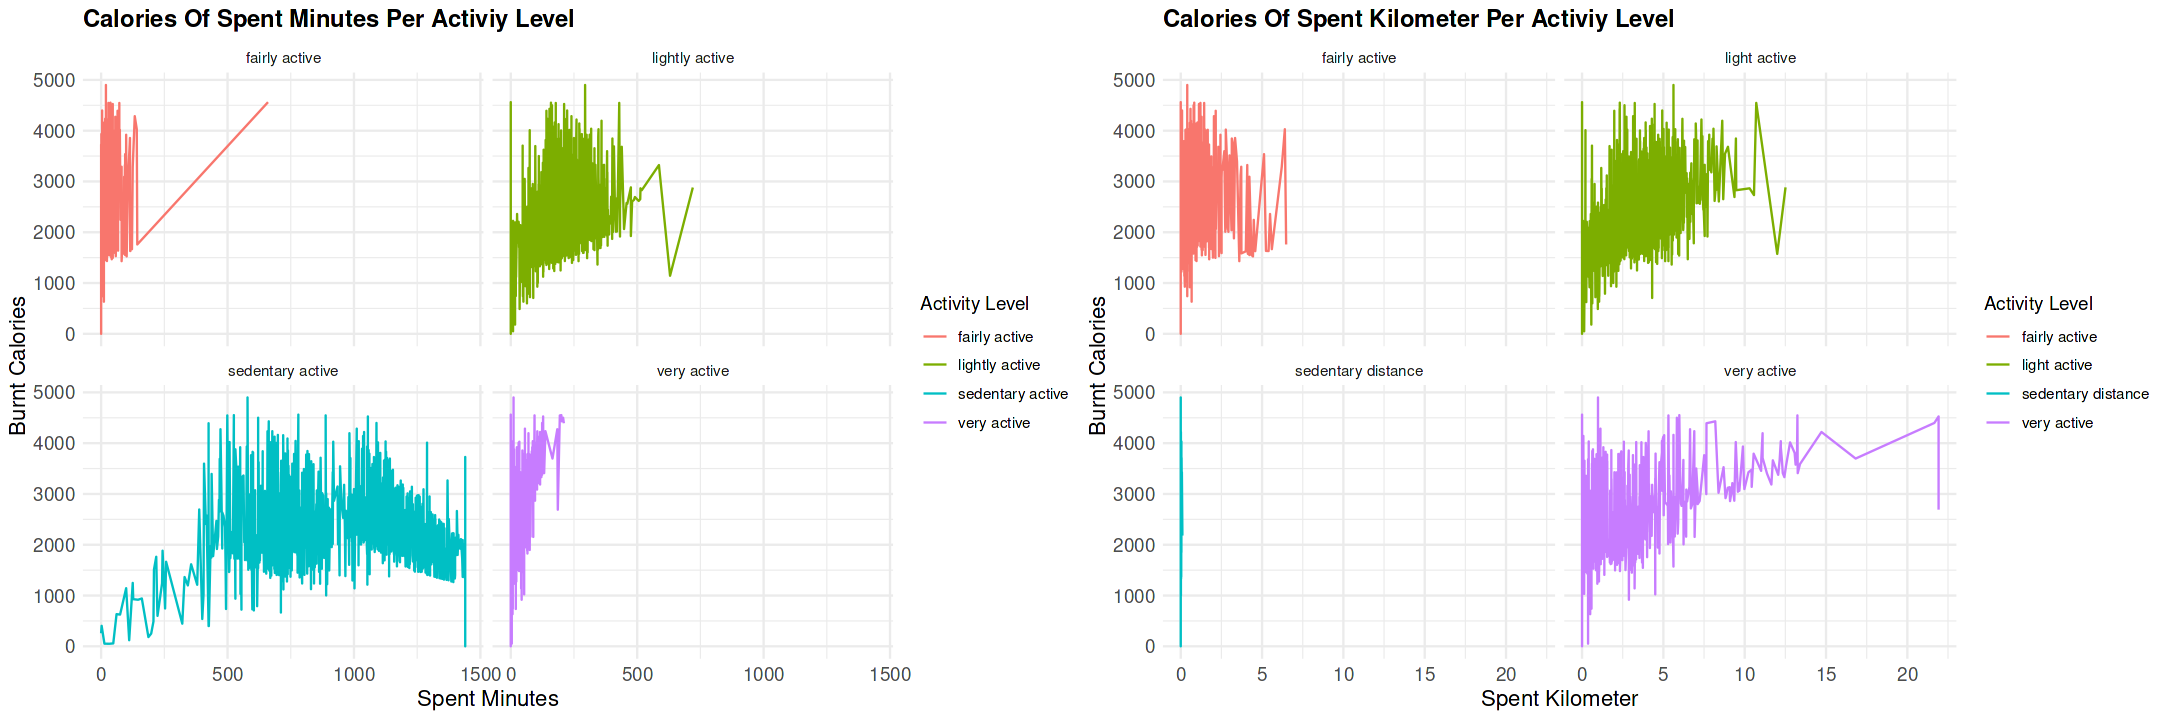

In [7]:
# Modify activity dataset
activity_level <- activity %>%
  pivot_longer(cols = c(very_active_minutes, fairly_active_minutes, lightly_active_minutes, sedentary_minutes), # converting to longer dataset
               names_to = "activity_level",
               values_to = "minutes") %>%
  pivot_longer(cols = c(very_active_distance, moderately_active_distance, light_active_distance, sedentary_active_distance), #converting to longer dataset
               names_to = "activity_distance",
               values_to = "kilometer") %>%
  mutate(activity_level = recode(activity_level,  #renaming activity level
                                   very_active_minutes = "very active", 
                                   fairly_active_minutes = "fairly active",
                                   lightly_active_minutes = "lightly active",
                                   sedentary_minutes = "sedentary active"),
                                   activity_distance = recode(activity_distance,   #renaming activity level
                                    very_active_distance = "very active",
                                    moderately_active_distance = "fairly active",  
                                    light_active_distance = "light active",
                                    sedentary_active_distance = "sedentary distance"))

#Display activiy chart per minutes
q1 <- ggplot(data = activity_level) + 
geom_line(mapping = aes(x = minutes, y = calories, color = activity_level)) +
facet_wrap(~activity_level) +  #categorize based on activity_level
labs(title = "Calories Of Spent Minutes Per Activiy Level", x = "Spent Minutes",
     y = "Burnt Calories", color = "Activity Level") +
theme_minimal() +   #remve noise
theme(plot.title = element_text (size =14, face = "bold"),  #adjust title size
     axis.text.x = element_text(size = 11),  #adjust axis x text size
     axis.text.y = element_text(size = 11),  #adjust axis y text size
     axis.title.x = element_text(size= 13),   #adjust axis x title size
     axis.title.y = element_text(size =13))    #adjust axix y title size


#Convey activity chart per km
q2 <- ggplot(data = activity_level) +
geom_line(mapping = aes(x = kilometer, y = calories, color= activity_distance)) +
facet_wrap(~activity_distance) +
labs(title = "Calories Of Spent Kilometer Per Activiy Level", x = "Spent Kilometer",
     y = "Burnt Calories", color = "Activity Level") +
theme_minimal() +   #remove noise
theme(plot.title = element_text (size =14, face = "bold"),  #adjust title size
     axis.text.x = element_text(size = 11),  #adjust axis x text size
     axis.text.y = element_text(size = 11),  #adjust axis y text size
     axis.title.x = element_text(size= 13),   #adjust axis x title size
     axis.title.y = element_text(size =13))    #adjust axix y title size

#adjust plot size
options(repr.plot.width = 18, repr.plot.height = 6)

#combine plots together
grid.arrange(q1, q2, ncol = 2)

#### Calories vs. Spent Minutes
1. Strong Positive Correlation in Active Minutes:
Fairly, lightly, and very active minutes all show a clear positive trend: more minutes spent, more calories burned. Especially strong for fairly_active_minutes and very_active_minutes.
2. Sedentary Activity Burns Fewer Calories:
Sedentary_minutes show a wide spread in calories burned for similar durations.
Indicates minimal calorie burn regardless of time spent.

#### Calories vs. Spent Kilometers
1. Very Active Distance = High Calorie Burn:
Very_active_distance shows a consistent upward trend—higher distance leads to significantly more calories burned.
2. Moderate and Light Distances Still Burn Noticeable Calories:
Even light_active_distance and moderately_active_distance are associated with considerable calorie burn, though with more variability.
3. Sedentary Distance Shows Almost No Impact
As expected, sedentary_active_distance leads to little or no calories burned, confirming expected behavior.

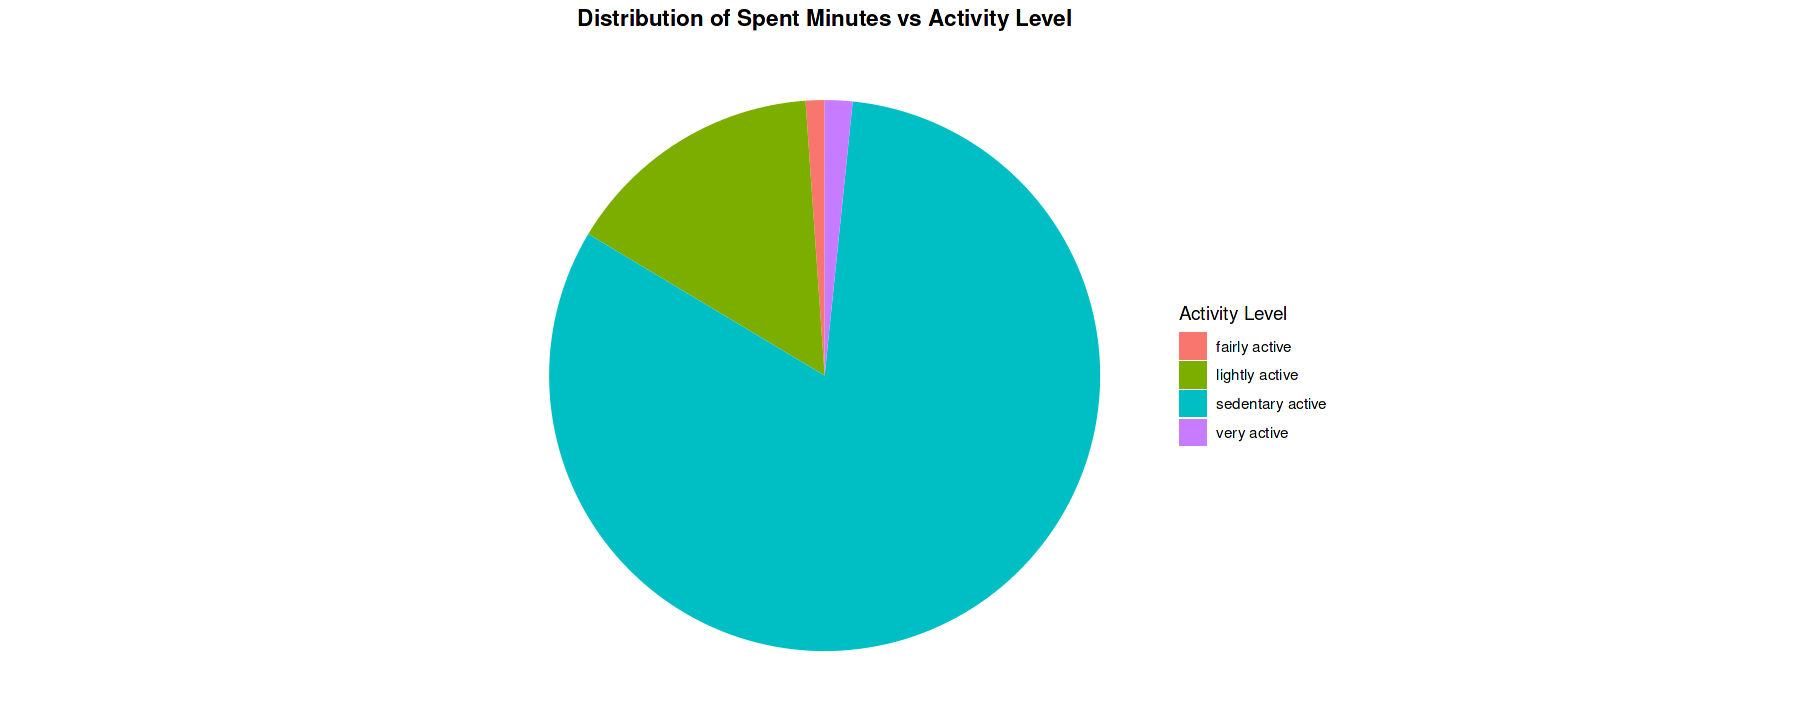

In [27]:
# conduct summary of activity level
activity_summary <- activity_level %>%
group_by(activity_level) %>%
summarize(total_minutes = sum(minutes))

#display summary of activity level 
ggplot(activity_summary, aes(x = "", y = total_minutes, fill = activity_level)) +
  geom_col(width = 1) +  #width of a circle 
  coord_polar(theta = "y") +  #make a pie
  labs(title = "Distribution of Spent Minutes vs Activity Level", fill = "Activity Level") +
  theme_void() +  #remove x axis 
  theme(plot.title = element_text(hjust = 0.5, face = "bold"))


#### Distribution of Activity Levels
- The largest portion of the pie is sedentary active, suggesting users spend most of their time inactive.
- Lightly active users make up a noticeable but smaller portion compared to sedentary ones.
- Fairly active and very active levels are tiny slices, indicating very few users engage in moderate to intense activity.


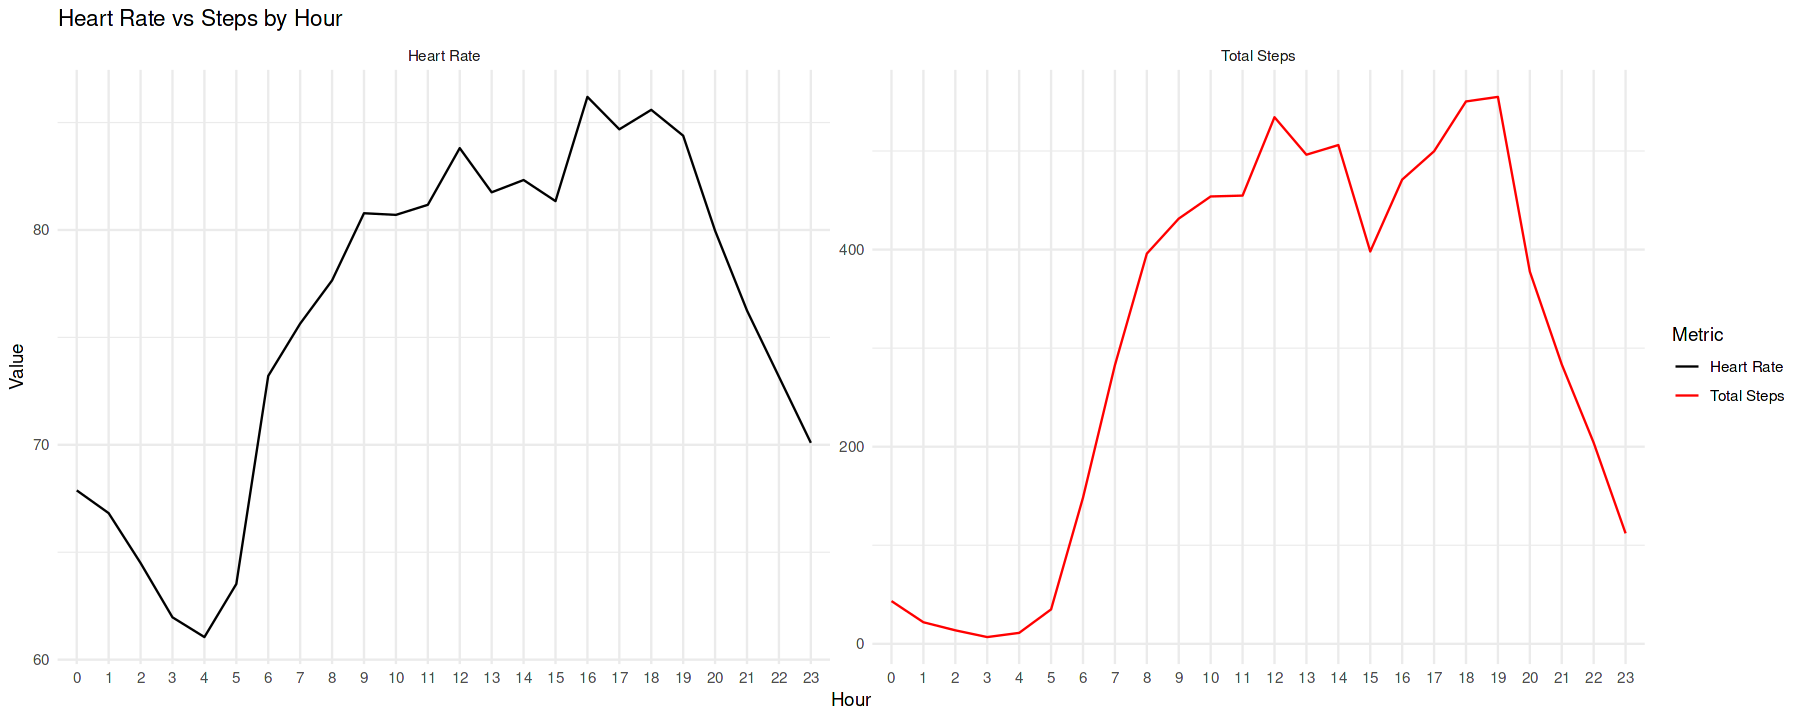

In [28]:
#combining heart rate and total step datasets
combined <- full_join(heart_hour, step_hour, by = c("activity_hour"= "activity_hour")) %>%
  pivot_longer(cols = c(step_total, hr), names_to = "metric", values_to = "value")

# display the heart chart vs total step 
ggplot(data = combined, aes(x = factor(activity_hour), y = value, color = metric, group = metric), size =1) +
  geom_line() +
 scale_color_manual(    #adjust color manually 
    values = c("hr" = "black", "step_total" = "red"),
    labels = c("hr" = "Heart Rate", "step_total" = "Total Steps"),  #adjust legend chart
    name = "Metric") +
  facet_wrap(~metric, scales = "free_y", labeller = as_labeller(c(hr = "Heart Rate", step_total = "Total Steps"))) +
  labs(title = "Heart Rate vs Steps by Hour", x = "Hour", y = "Value", color = "Metric") +
  theme_minimal()

#### Heart Rate vs Steps by Hour
1. The correlation between heart rate and steps is quite clear:
- Higher step count = higher heart rate, and both follow a daily rhythm.
2. Both chart fall down during sleep hours at night (00-05 of day) and both start to rise at work hours (05-19 of day) which could be suggestive of having a stable work routine.

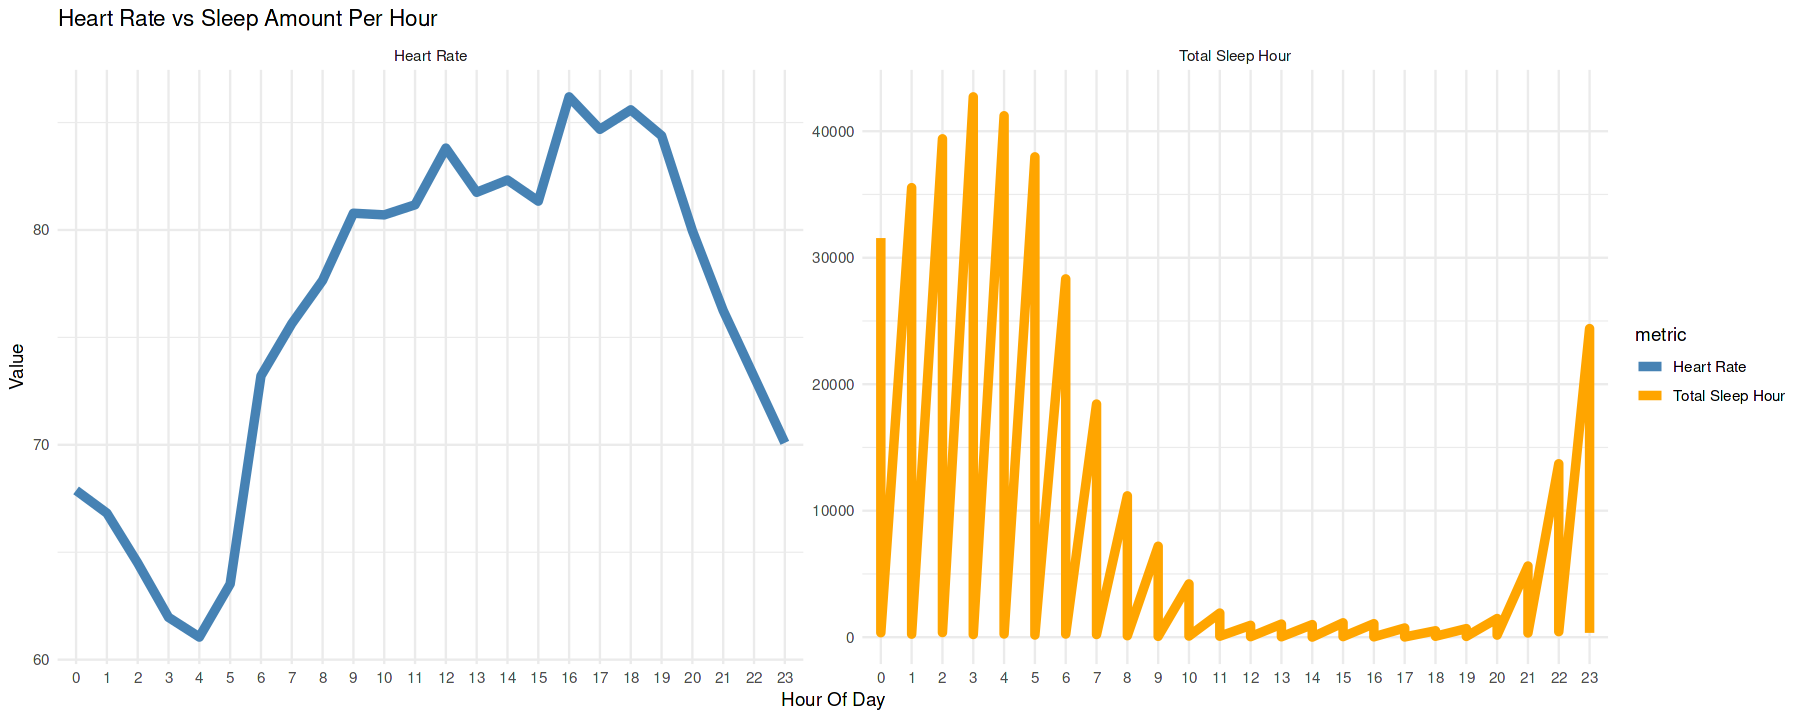

In [29]:
# combine sleep and heart rate datasets
heart_sleep <- full_join(sleep_hour, heart_hour, by = ("activity_hour" = "activity_hour")) %>%
pivot_longer(cols = c(total_hour, hr), names_to = "metric", values_to = "value")

#display heart rate vs sleep time per day
ggplot(data = heart_sleep) +
geom_line(aes(x = factor(activity_hour), y = value, color = metric, group = metric), linewidth = 2) +
scale_color_manual(  
values = c("hr" = "steelblue", "total_hour" = "orange"), #adjust line`s color
labels = c("hr" = "Heart Rate", "total_hour" = "Total Sleep Hour")) +  #rename legend chart
facet_wrap(~metric, scales = "free_y", labeller = as_labeller(c(hr = "Heart Rate", total_hour = "Total Sleep Hour"))) +
labs(title = "Heart Rate vs Sleep Amount Per Hour", x = "Hour Of Day", y = "Value") +  
theme_minimal()

#### Heart Rate vs Sleep Amount Per Hour
There's a clear inverse relationship between sleep hours and heart rate.
* As sleep decreases (morning) → heart rate increases (activity).
* As sleep increases (night) → heart rate decreases (recovery).
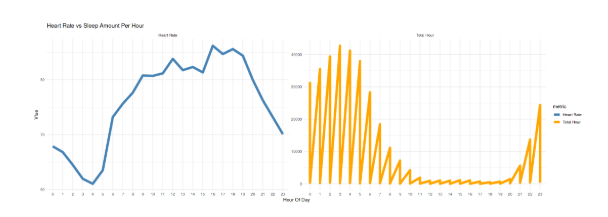

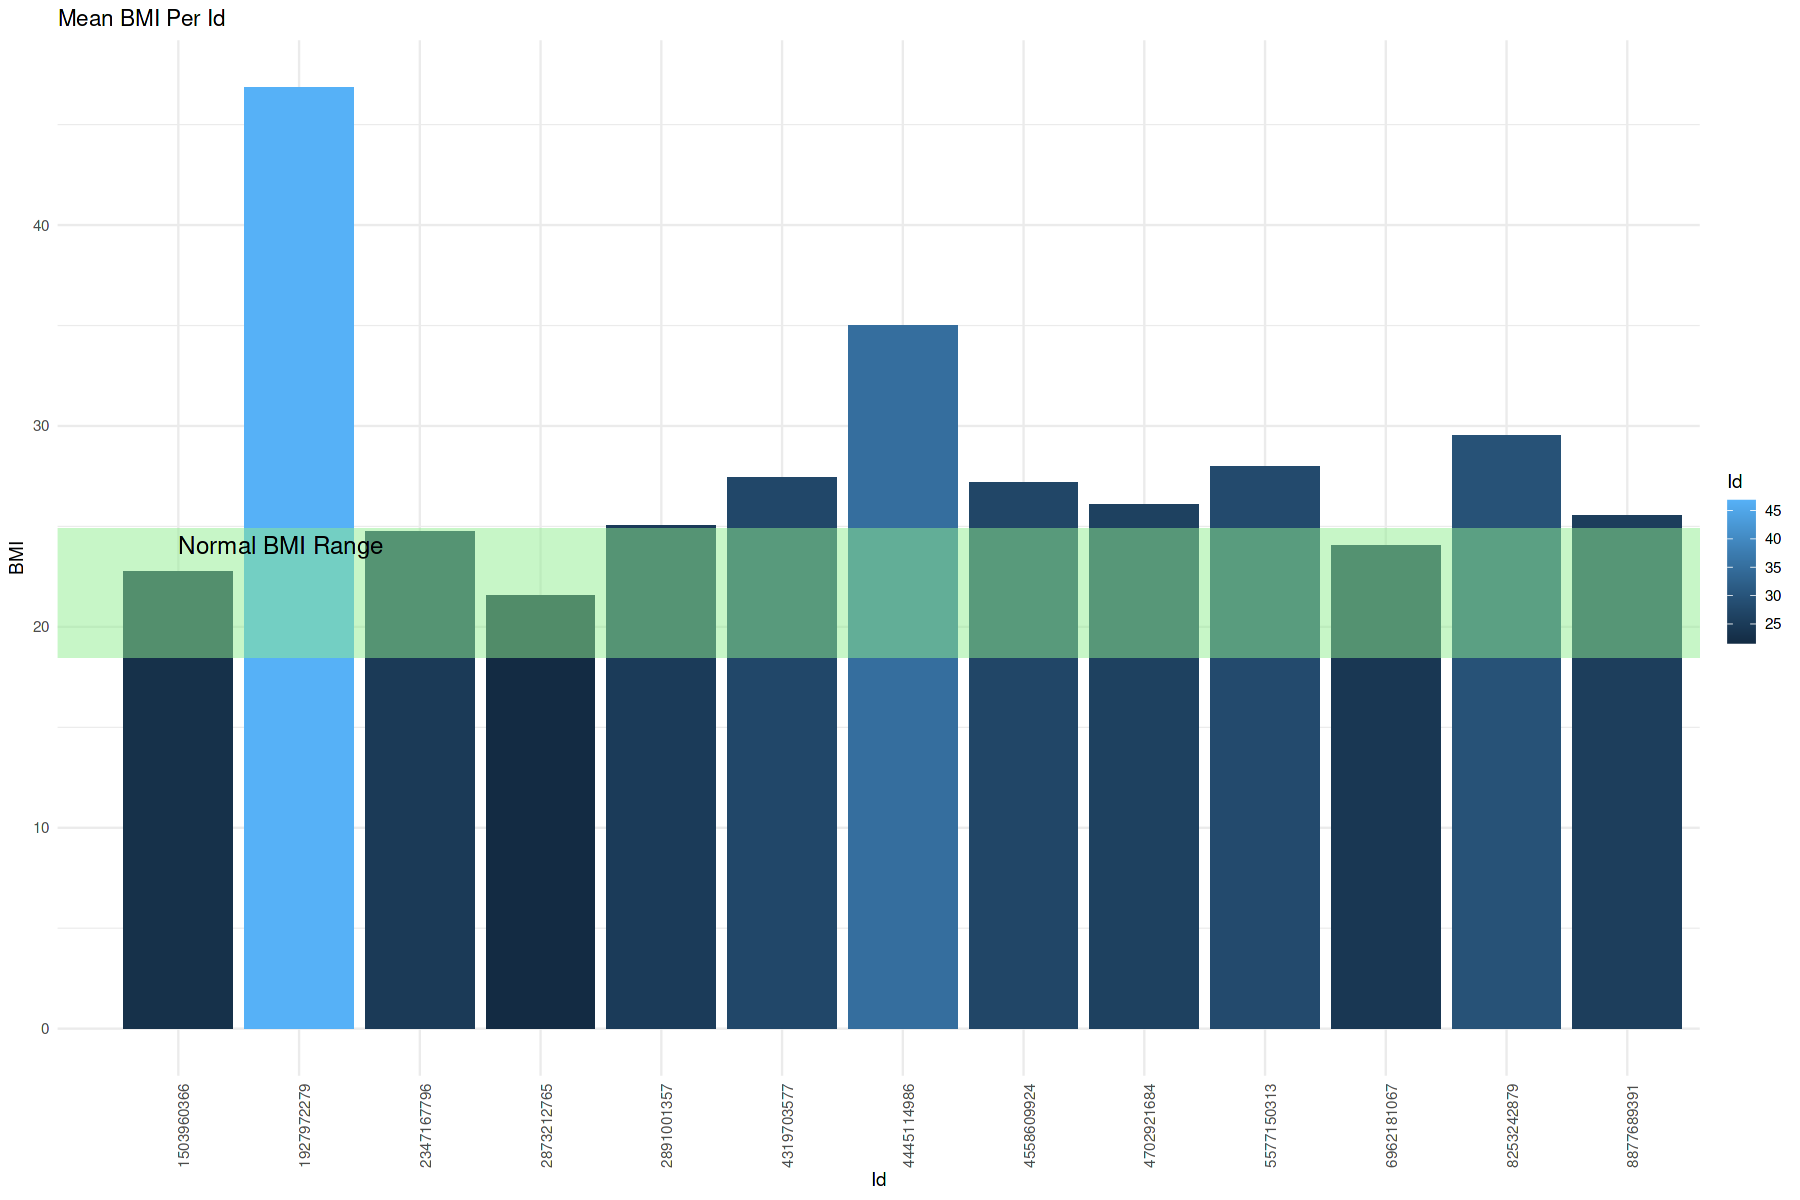

In [31]:
# conducting weight summary
bmi <- weight %>%
  group_by(id) %>%
  summarize(mean_bmi = mean(bmi))
            
#displaying weight chart
ggplot(data = bmi) +
geom_col(mapping = aes(x = factor(id), y = mean_bmi, fill = mean_bmi)) +
labs(title = "Mean BMI Per Id", x = "Id", y = "BMI", fill = "Id") +
annotate ("rect", xmin = 0, xmax = Inf ,ymin = 18.5, ymax = 24.9, alpha = 0.5, fill = "lightgreen") + # highlight normal BMI range
annotate("text", x = 1, y = 24.5, label = "Normal BMI Range", hjust = 0, vjust = 1, size = 5, color = "black") +
theme_minimal() +   #remove extra noise
theme(axis.text.x = element_text(angle = 90))

#adjust plot size
options(repr.plot.width = 15, repr.plot.height = 10)


#### Mean Weight Per Id
The majority of users have BMIs between 20 and 30.
There’s a good spread, but only one user stands out dramatically (1927972279, indicating potential risk of obesity.

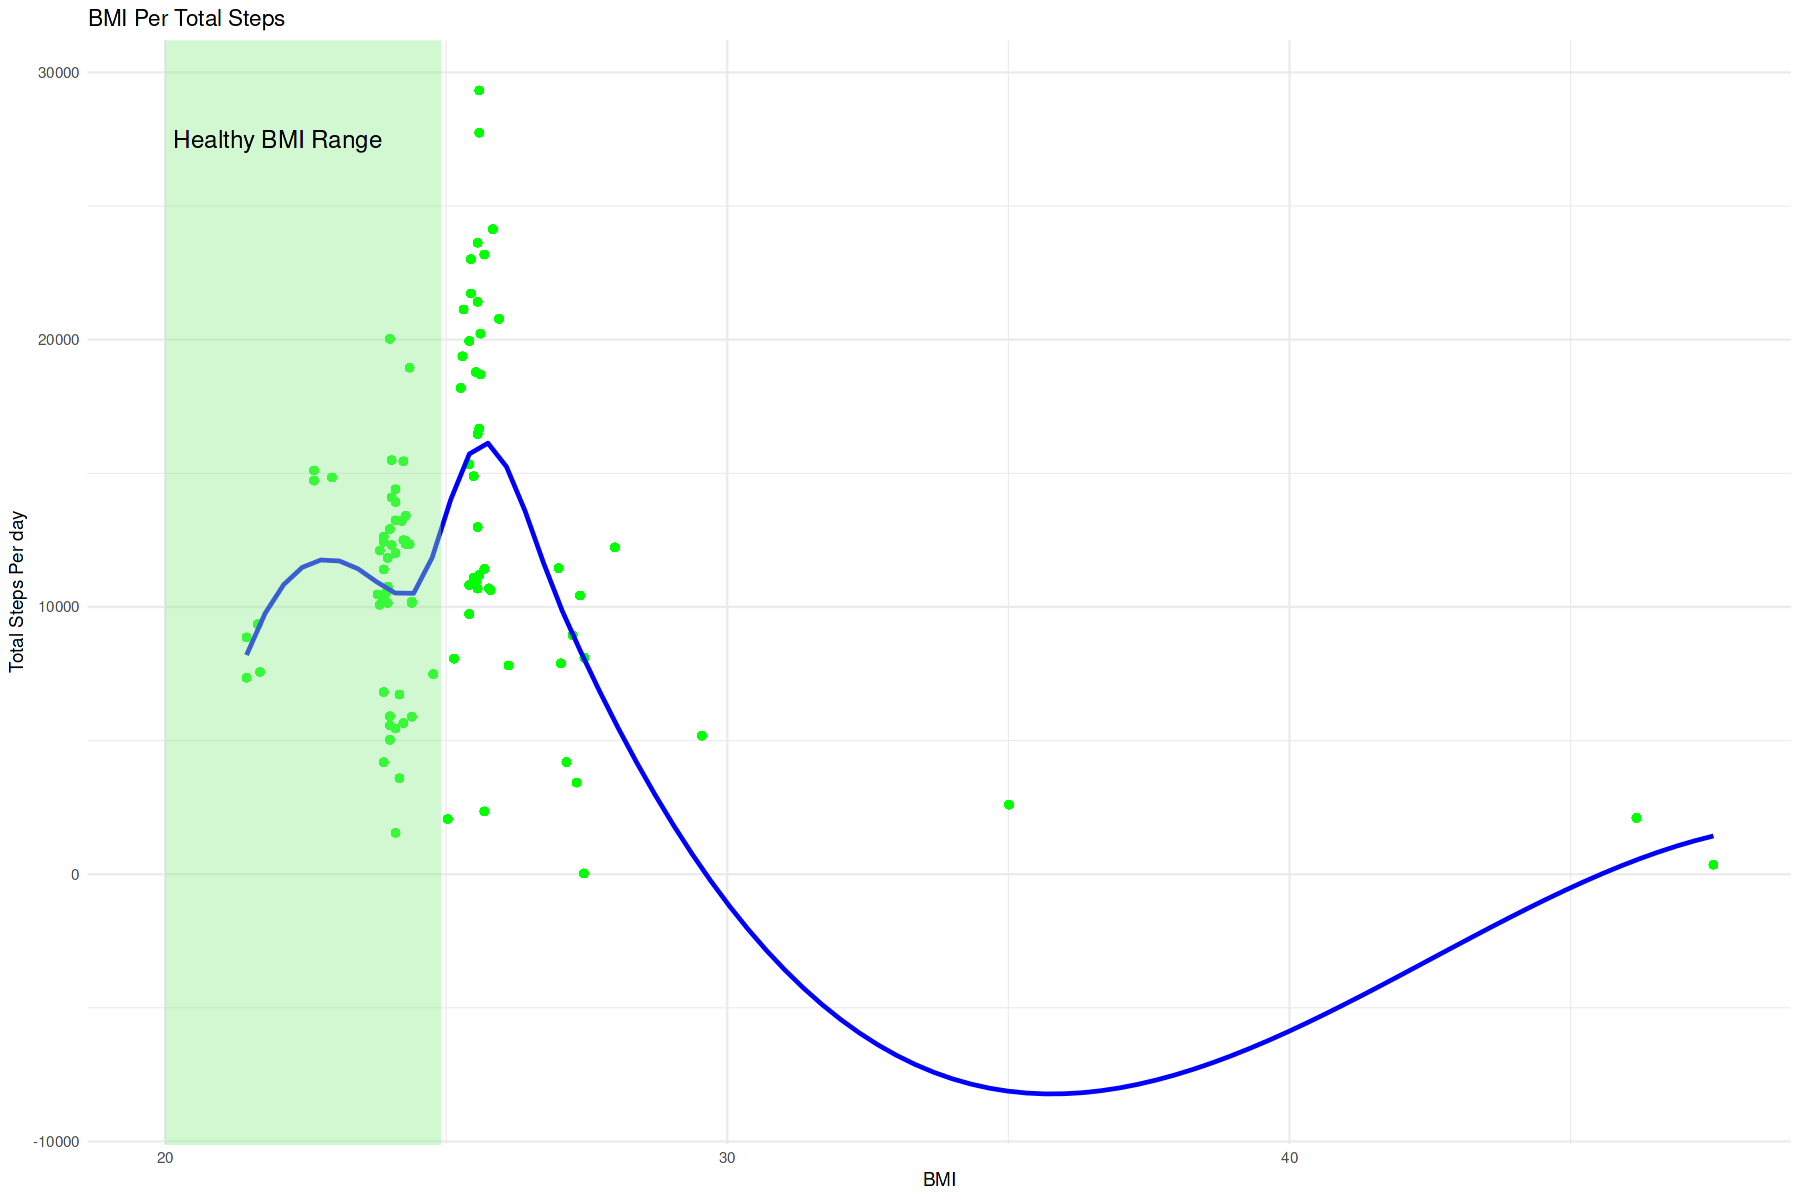

In [32]:
# conduct a summary of weight
weight1 <- weight %>%
mutate(date = as.Date(date)) %>%
group_by(id,date) %>%
summarize(mean_weight = mean(weight_kg), mean_bmi = mean(bmi), .groups = "drop")

# combine weight and activity datasets
weight_activity <- left_join (weight1, activity_level, by = c("date" = "activity_date", "id"))

#display weight per total step for each id 
ggplot(data = weight_activity, aes(x = mean_bmi, y = total_steps)) +
geom_point(color = "green") +
geom_smooth(method = "loess", formula = y ~ x,color = "blue", se = FALSE) +
labs(title = "BMI Per Total Steps", x = "BMI", y = "Total Steps Per day") +
annotate("rect", xmin = 20, xmax = 24.9, ymin = -Inf, ymax = Inf, alpha = 0.4, fill = "lightgreen") + #create healthy BMI zone
annotate("text", x = 22, y = 27500, label = "Healthy BMI Range", size = 5) +
theme_minimal()  #remove noise

#### Weight Per Total Steps
1. Trend by Weight Groups:
- Less than 70 kg: Moderate spread, with most people taking between 5,000 and 15,000 steps. Slight decrease in steps as weight increases.
- 70–90 kg: Noticeable increase in total steps, especially around 80–85 kg.
- Above 90 kg: Steady decline in steps as weight increases. Very few high-step individuals in this group.
2. Potential Insight:
- Individuals around 80–85 kg may be the most active in this dataset.
- Heavier individuals (90+ kg) tend to be less active.
- Lighter individuals (<70 kg) vary a lot — some are highly active, some not.

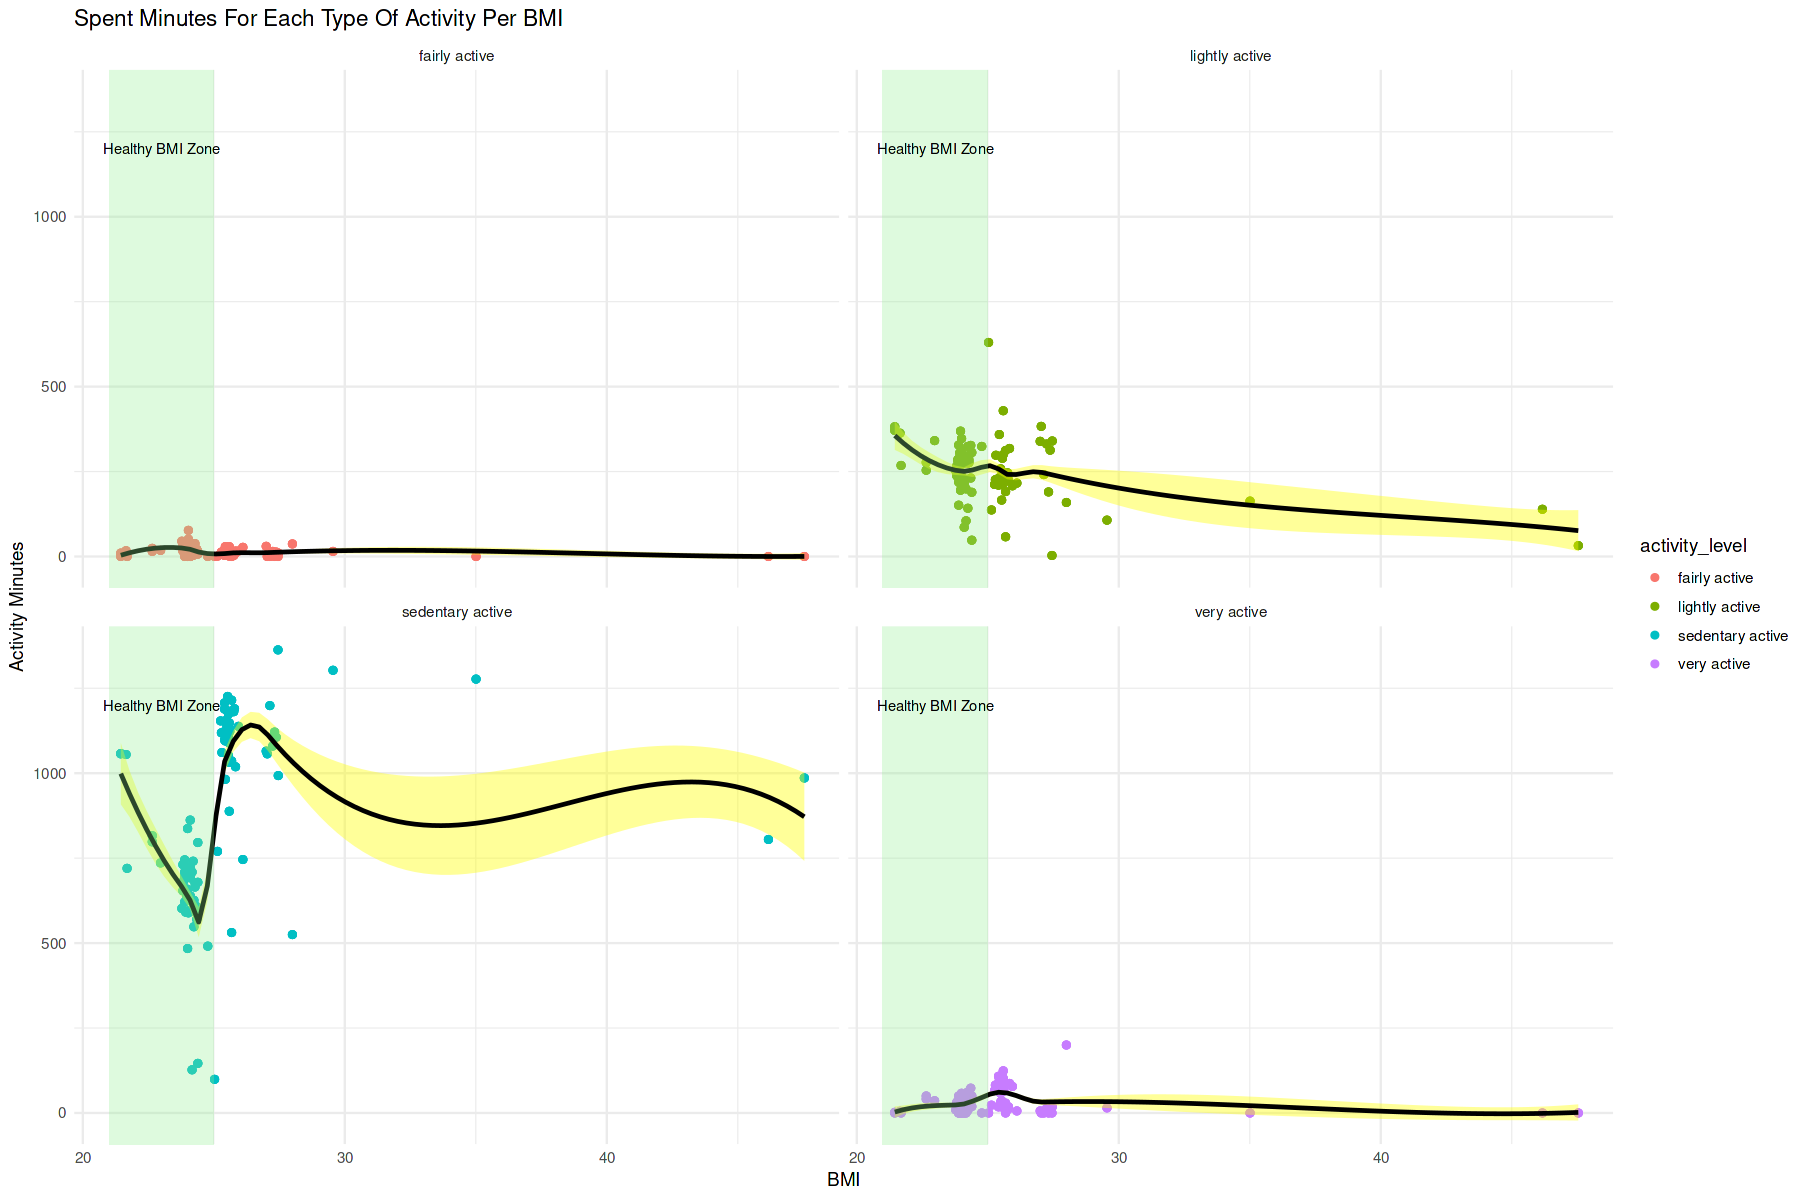

In [33]:
ggplot(data = weight_activity, aes(x = mean_bmi, y = minutes, color = activity_level)) +
geom_point() +
geom_smooth(method = "loess", formula = y ~ x, color = "black", fill = "yellow") +
facet_wrap(~activity_level) +
annotate("rect", xmin = 21, xmax = 25, ymin = -Inf, ymax = Inf, alpha = 0.3, fill = "lightgreen") +   # shows healthy BMI
annotate("text", x = 23, y = 1200, label = "Healthy BMI Zone", size = 3)+
labs(title = "Spent Minutes For Each Type Of Activity Per BMI", x = "BMI", y = "Activity Minutes") +
theme_minimal() 

#### Spent Minutes For Each Type Of Activity Per BMI
1. Fairly active level:
- Mostly done by healthy BMI users.
- All users spend low time for this type of activiy.
2. Sedentary active level:
- High activity minutes at low BMI.
- Suggest individyuals with very low and very high BMI spending more time sedentary (which includes rest, screen time, etc.)
- Most popular type of activiy among all.
3. Lightly active level:
- Activity minutes are the highest in the healthy BMI range, then gently decrease with increasing BMI.
- Indicates more moderate daily activity among people with healthy weight.
4. Very active level:
- Consistency low minutes across all BMI values.
- Minimal deviation and very few participants fall in this category.
- Mostly healthy BMI users end up doing it.
Overal insights:
- Most activity comes from sedentary active and lightly active categories.
- High BMI individuals are less likely to engange in higher activity levels
- Very active behavour is rare across all BMI ranges.

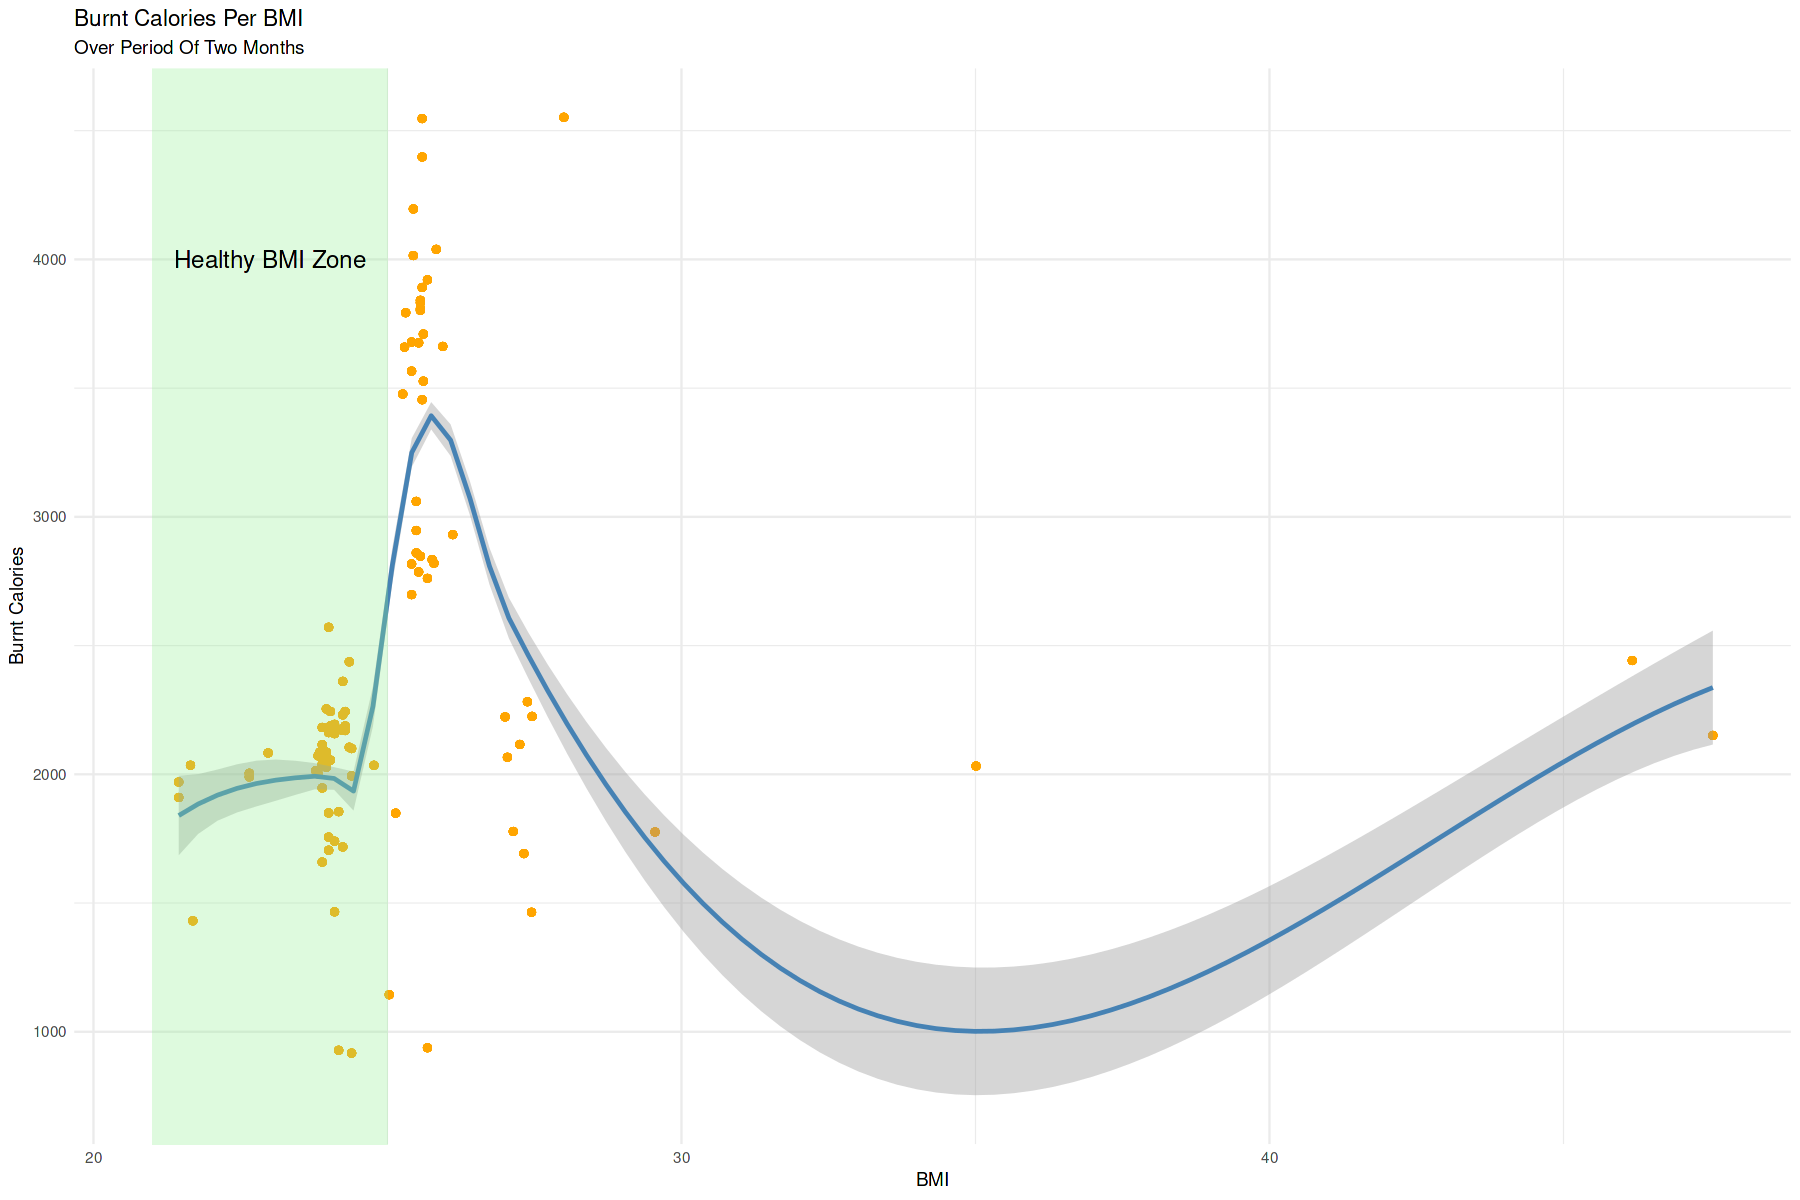

In [34]:
# display calories per BMI
ggplot(data = weight_activity, aes(x = mean_bmi, y = calories)) +
geom_point(color = "orange") +
geom_smooth(method = "loess", formula = y ~ x, color = "steelblue")+ 
annotate("rect", xmin = 21, xmax = 25, ymin = -Inf, ymax = Inf, alpha = 0.3, fill = "lightgreen") +   # shows healthy BMI
annotate("text", x = 23, y = 4000, label = "Healthy BMI Zone", size = 5)+
labs(title = "Burnt Calories Per BMI", subtitle = "Over Period Of Two Months", x = "BMI", y = "Burnt Calories") +
theme_minimal() 

#### Burnt calories per BMI
1. Representation:
- Blue curve showing the general relationship between BMI and calorie burn.
- Shaded blue area around curve, indicating the uncertainty around the trend line.
- Orange dots showing individual data points of calorie burn per person per BMI value.
2. Insights:
- Peope just abive the healthy BMI range (possibly slightly overweight) may burn more calories perhaps due to increased physical activity to manage weight.
-  Very high BMIs tebd to show reduced calorie burn, possibly due to reducrd mobility or sedentary lifestyle.

# Share
In this phase of analysis, the key focus is on sharing our finding with stakeholders, then based on our finding i would suggest recommendations.

### Overall Situation Summary
The most concerning findings are:
- Majority of time is spent sedentary
- Very few engage in intense physical activity
- Average sleep duration is below recommended levels (5–5.5 hours)
- Weekend sleep compensation suggests poor weekday sleep
- Slight obesity-related risks in weight vs activity correlation
- High-BMI users burn fewer calories and engage in less movement

### Detailed Insights by Category 
1.  Sleep Patterns:
- Sleep dominates users’ nighttime hours, but average sleep time is still below the recommended 7–9 hours.
- Users sleep longer on weekends, compensating for lost sleep during weekdays.
- Restless and awake moments mostly occur between midnight and 7 AM.
- Sleep time starts around 10–11 PM and peaks at 2–4 AM.
Interpretation: Most users sleep during the right hours but not long enough. Some also experience light fragmentation (restless/awake).

2. Activity Behavior
- Sedentary activity dominates the pie chart—users are mostly inactive.
Light activity is present but only moderate.
- Very active behavior is rare, even among healthy BMI users.
- Saturday is the most active day, while Sunday is the least.
- Daily movement begins around 6–7 AM, peaks in afternoon hours (2–6 PM), and drops off after 8 PM.
Interpretation: Most users have structured routines, possibly due to work, but lack intensity in physical activity.

3. Heart Rate Analysis:
- Heart rate patterns follow sleep and activity cycles.
- Lowest rates (resting) are around 2–5 AM.
- Highest rates appear late morning through early evening (11 AM – 6 PM), coinciding with high activity.
- Saturday shows the highest heart rate, pointing to workouts or social activity.
Interpretation: Heart rate data is in line with activity and sleep cycles, indicating mostly normal cardiovascular responses.

4. BMI, Weight & Calories:
- Most users fall in a healthy BMI range (20–30).
- Only one outlier shows signs of obesity risk.
- Users around 80–85 kg are most active; above 90 kg, activity declines.
- Higher BMI = fewer calories burned and less intense activity.
- Users slightly above healthy BMI may burn more calories, possibly due to purposeful movement.
Interpretation: Weight and BMI are closely tied to activity, heavier users are more sedentary, which can reinforce a negative cycle.

### Recommendations and Improvements
1. Improve Sleep Duration & Consistency:
Goal: Reach 7–8 hours per night consistently.
- Sending notifications if night sleep is less than 7 hours.
- Getting reminder an hour before bed time to stop using screen.
- Encouraging people to use their device during sleep hours by creating contests like: 100 days quest, one month free consalation for health and notritunes.

2. Promote Moderate to Intense Activity:
Goal: Shift users from “sedentary” to “light” or “fairly active”.
- Introduce step challenges (e.g., 10,000 steps/day).
- Encourage fun, social weekend workouts to maintain activity beyond Saturday.
- Create a tournament with users of the same condition (activity level and BMI, etc.) to motivate them compete for being healthier.

3. Maintain Healthy Heart Rate Patterns:
Goal: Keep cardiovascular patterns stable and improve through activity.
- Encourage HR zone awareness using Fitbit features.
- Focus hydration and nutrition, which also affect HR by sending drink water reminders.

4. Increase Calorie Burn with Smart Movement:
Goal: Help users burn more without overexertion.
- Encourage brisk walks, stairs, short jogs.
- Creating short episodes or article that educate about active commuting or standing desks.
- publish a Weekly Activity Report layout that conveys intensity, duration, and engagement trends across a week.








# Thanks for exploring my Bellabeat case study!
#### If you found it insightful, please don’t forget to leave a comment and hit the upvote button — your support means a lot!